In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture

from sklearn.metrics import calinski_harabasz_score, silhouette_score

from texttable import Texttable

In [2]:
def plot_diagrams(col,data):
    sb.countplot(x = col, data = data,
            order = data[f"{col}"].value_counts().index)
    plt.xticks(rotation = 70)
    plt.title(col)
    plt.show()
    print(data[f"{col}"].value_counts())

In [3]:
def fillna_column(df, column):
    df[column] = df[column].fillna(df[column].value_counts().index[0])
    return df

In [4]:
def plot_clusters(df, pred, var1, var2):
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(df.values[:, var1], df.values[:, var2], c=pred)
    legend = ax.legend(*scatter.legend_elements())
    ax.add_artist(legend)
    plt.xlabel(df.columns[var1])
    plt.ylabel(df.columns[var2])
    plt.show()

# Exploración de los datos

In [5]:
#Leer el dataset
dataset = pd.read_csv('diabetic_data.csv')

#Reemplazar los ? con valores nulos
dataset = dataset.replace("?",np.nan)

dataset.shape

(101766, 50)

In [6]:
df = dataset.copy()

In [7]:
#Admission type id
df.admission_type_id = df.admission_type_id.replace({1.0:"Emergency",
                                                    2.0:"Urgent",
                                                    3.0:"Elective",
                                                    4.0:"New Born",
                                                    5.0:"Not Available",
                                                    6.0:"NULL",
                                                    7.0:"Trauma Center",
                                                    8.0:"Not Mapped"})

In [8]:
discharge_disposition_id={1 : 'Discharged to home', 2 : 'Discharged/transferred to another short term hospital', 3 : 'Discharged/transferred to SNF',4 : 'Discharged/transferred to ICF',
                          5 : 'Discharged/transferred to another type of inpatient care institution', 6 : 'Discharged/transferred to home with home health service', 7 : 'Left AMA', 8 : 'Discharged/transferred to home under care of Home IV provider',
                          9 : 'Admitted as an inpatient to this hospital', 10 : 'Neonate discharged to another hospital for neonatal aftercare', 11 : 'Expired', 12 : 'Still patient or expected to return for outpatient services',13 : 'Hospice / home',
                          14 : 'Hospice / medical facility', 15 : 'Discharged/transferred within this institution to Medicare approved swing bed', 16 : 'Discharged/transferred/referred another institution for outpatient services', 17 : 'Discharged/transferred/referred to this institution for outpatient services',18 : 'NULL',
                          19 : 'Expired at home. Medicaid only, hospice.', 20 : 'Expired in a medical facility. Medicaid only, hospice.', 21 : 'Expired, place unknown. Medicaid only, hospice.', 22 : 'Discharged/transferred to another rehab fac including rehab units of a hospital.', 23 : 'Discharged/transferred to a long term care hospital.', 24 : 'Discharged/transferred to a nursing facility certified under Medicaid but not',
                          25 : 'Not Mapped', 26 : 'Unknown/Invalid', 27 : 'Discharged/transferred to a federal health care facility.', 28 : 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct', 29 : 'Discharged/transferred to a Critical Access Hospital (CAH).', 30 : 'Discharged/transferred to another Type of Health Care Institution not Defined'}

df.discharge_disposition_id = df.discharge_disposition_id.replace(discharge_disposition_id)

In [9]:
#Admission source id
admission_source_id = {1: "Physician Referral", 2: "Clinic Referral", 3: "HMO Referral", 4: "Transfer from a hospital", 5: "Transfer from a Skilled Nursing Facility (SNF)", 6: "Transfer from another health care facility", 
                       7: "Emergency Room", 8: "Court/Law Enforcement", 9: "Not Available", 10: "Transfer from critial access hospital", 11: "Normal Delivery", 12: "Premature Delivery",
                       13: "Sick Baby", 14: "Extramural Birth", 15: "Not Available", 17: "NULL",18: "Transfer From Another Home Health Agency", 19: "Readmission to Same Home Health Agency", 
                       20: "Not Mapped", 21: "Unknown/Invalid", 22: "Transfer from hospital inpt/same fac reslt in a sep claim", 23: "Born inside this hospital", 24: "Born outside this hospital", 
                       25: "Transfer from Ambulatory Surgery Center", 26: "Transfer from Hospice"}

df.admission_source_id = df.admission_source_id.replace(admission_source_id)


In [10]:
df.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [11]:
for label in df.columns:
    if not pd.api.types.is_numeric_dtype(df[label]):
        print(df[label].value_counts())
        print('*******************************')

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
*******************************
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
*******************************
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
*******************************
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64
*******************************
Emergency        53990
Elective         18869
Urgent           18480
NULL              5291
Not Available     4785
Not Mapped         320
Trauma Center       21
New Born            10
Name: admission_type_id, dtype: int64
*****

No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64
*******************************
No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64
*******************************
No    54755
Ch    47011
Name: change, dtype: int64
*******************************
Yes    78363
No     23403
Name: diabetesMed, dtype: int64
*******************************
NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64
*******************************


# Pre-procesamiento

In [12]:
df1 = df.copy()
df2 = df.copy()

## Versión 1

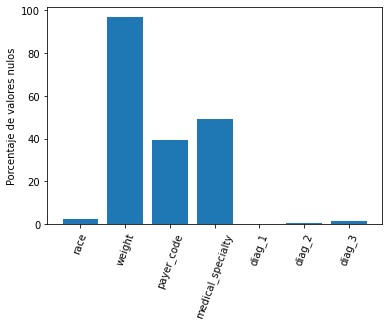

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64


In [13]:
#Obtener las columnas con valores nulos
columns_na = df1.columns[df1.isna().any()]
per = []
for col in columns_na:
    per.append((df1[col].isna().sum() / len(df1))*100)
    
#Dibujar los porcentajes de valores nulos
plt.bar(columns_na, per)
plt.xticks(rotation=70)
plt.ylabel('Porcentaje de valores nulos')
plt.show()

#Porcentaje valores nulos
na_ratio = ((df1.isna().sum() / len(df1))*100).sort_values(ascending = False)
print(na_ratio[na_ratio>0])

In [14]:
df1 = df1.drop(['weight', 'medical_specialty', 'payer_code'], axis=1)

In [15]:
#Rellenar los na con el valor mas comun
columns_na = df1.columns[df1.isna().any()]
for column in columns_na:
    df1 = fillna_column(df1,column)

In [16]:
#Comprobar si hay columnas con valores nulos
na_ratio = ((df1.isna().sum() / len(df1))*100).sort_values(ascending = False)
print(na_ratio[na_ratio>0])

Series([], dtype: float64)


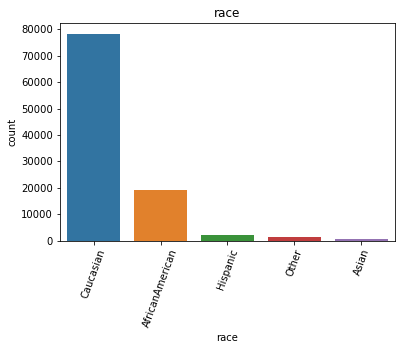

Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [17]:
#Distribucion final de race
plot_diagrams("race", df1)

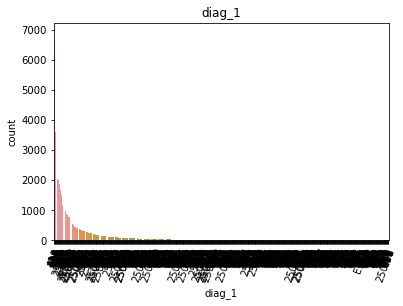

428    6883
414    6581
786    4016
410    3614
486    3508
       ... 
837       1
471       1
870       1
915       1
698       1
Name: diag_1, Length: 716, dtype: int64


In [18]:
#Distribucion final de diag_1
plot_diagrams("diag_1", df1)

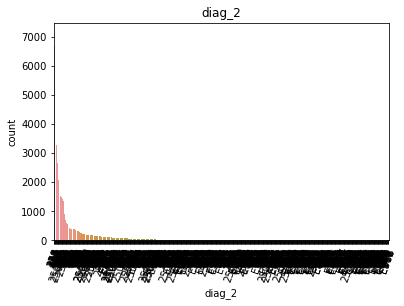

276     7110
428     6662
250     6071
427     5036
401     3736
        ... 
748        1
140        1
E968       1
E883       1
912        1
Name: diag_2, Length: 748, dtype: int64


In [19]:
#Distribucion final de diag_2
plot_diagrams("diag_2", df1)

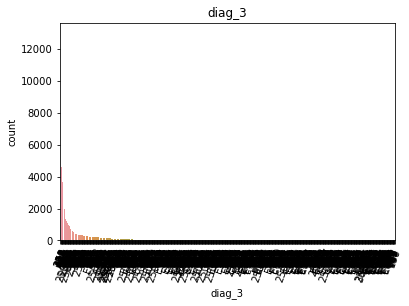

250    12978
401     8289
276     5175
428     4577
427     3955
       ...  
987        1
387        1
75         1
17         1
186        1
Name: diag_3, Length: 789, dtype: int64


In [20]:
#Distribucion final de diag_3
plot_diagrams("diag_3", df1)

In [21]:
#Eliminar los identificadores de los encuentros y de los pacientes
df1 = df1.drop(['patient_nbr','encounter_id'], axis=1)

In [22]:
#One hot encoding
df1_data = pd.get_dummies(df1)

df1_data.shape

(101766, 2416)

In [23]:
#Normalizar las variables numericas
numeric = df1_data[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]
sc = StandardScaler()
numericSC = pd.DataFrame(sc.fit_transform(numeric),columns=numeric.columns)

#Unir las variables numericas normalizadas con las categoricas una vez aplicadas One-Hot Encoding
categorical = df1_data[df1_data.drop(numeric.columns,axis=1).columns]
df1_dataScaled = pd.concat([numericSC, categorical], axis=1, join='inner')

In [24]:
#Guardar el 50% de los datos para usar posteriormente en el BIRCH
df1_sample = df1_dataScaled.sample(frac=0.5, replace=False, random_state=1234)
df1_sample.shape

(50883, 2416)

## Versión 2

In [25]:
#Eliminar las variables con un 35% o mas de valores nulos
df2 = df2.drop(['weight', 'medical_specialty', 'payer_code'], axis=1)

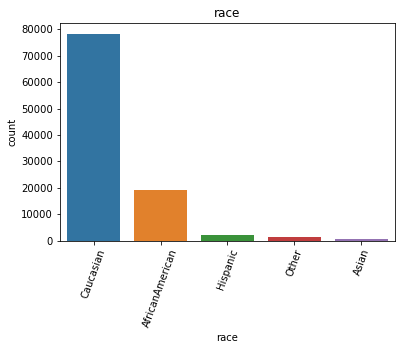

Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [26]:
#Rellenar la variable race con la categoria mas común
df2 = fillna_column(df2,'race')
plot_diagrams("race", df2)

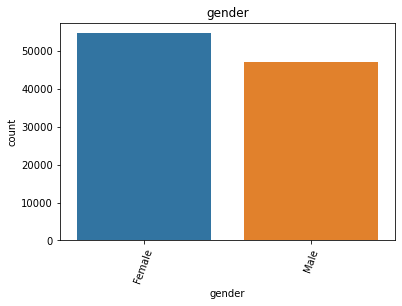

Female    54711
Male      47055
Name: gender, dtype: int64


In [27]:
#Rellenar la variable gender con la categoria mas común
df2.gender = df2.gender.replace({'Unknown/Invalid': 'Female'})
plot_diagrams("gender", df2)

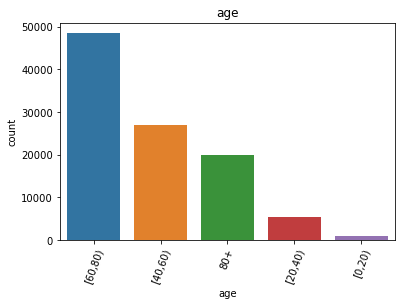

[60,80)    48551
[40,60)    26941
80+        19990
[20,40)     5432
[0,20)       852
Name: age, dtype: int64


In [28]:
#Agrupar las categorias de la variable age
df2.age = df2.age.replace({"[0-10)":"[0,20)",
                                 "[10-20)":"[0,20)",
                                 "[20-30)":"[20,40)",
                                 "[30-40)":"[20,40)",
                                 "[40-50)":"[40,60)",
                                 "[50-60)":"[40,60)",
                                 "[60-70)":"[60,80)",
                                 "[70-80)":"[60,80)",
                                 "[80-90)":"80+",
                                 "[90-100)":"80+"})
plot_diagrams("age", df2)

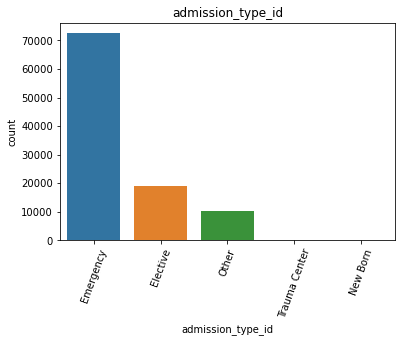

Emergency        72470
Elective         18869
Other            10396
Trauma Center       21
New Born            10
Name: admission_type_id, dtype: int64


In [29]:
#Agrupar las categorias de la variable Admission type id
df2.admission_type_id = df2.admission_type_id.replace({'Urgent': 'Emergency',
                                                    'Not Available': 'Other',
                                                    'NULL': 'Other',
                                                    'Not Mapped': 'Other'})
plot_diagrams("admission_type_id", df2)

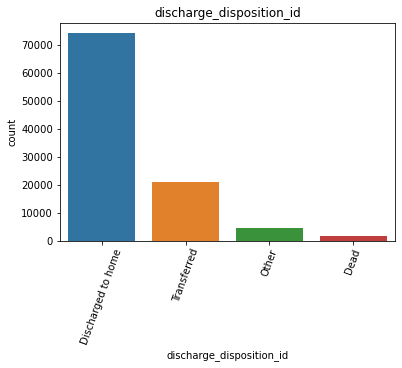

Discharged to home    74266
Transferred           21168
Other                  4680
Dead                   1652
Name: discharge_disposition_id, dtype: int64


In [30]:
#Agrupar las categorias de la variable Discharge disposition id
discharge_disposition_id={'Discharged/transferred to another short term hospital': 'Transferred', 'Discharged/transferred to SNF': 'Transferred', 'Discharged/transferred to ICF': 'Transferred',
                          'Discharged/transferred to another type of inpatient care institution': 'Transferred', 'Discharged/transferred to home with home health service': 'Discharged to home', 'Left AMA': 'Discharged to home', 
                          'Discharged/transferred to home under care of Home IV provider': 'Discharged to home', 'Admitted as an inpatient to this hospital': 'Transferred', 'Neonate discharged to another hospital for neonatal aftercare': 'Transferred', 
                          'Expired': 'Dead', 'Still patient or expected to return for outpatient services': 'Transferred', 'Hospice / home': 'Discharged to home', 'Hospice / medical facility': 'Transferred', 
                          'Discharged/transferred within this institution to Medicare approved swing bed': 'Transferred', 'Discharged/transferred/referred another institution for outpatient services': 'Transferred', 
                          'Discharged/transferred/referred to this institution for outpatient services': 'Transferred', 'NULL': 'Other', 'Expired at home. Medicaid only, hospice.': 'Dead', 'Expired in a medical facility. Medicaid only, hospice.': 'Dead', 
                          'Expired, place unknown. Medicaid only, hospice.': 'Dead', 'Discharged/transferred to another rehab fac including rehab units of a hospital.': 'Transferred', 'Discharged/transferred to a long term care hospital.': 'Transferred', 
                          'Discharged/transferred to a nursing facility certified under Medicaid but not': 'Transferred', 'Not Mapped': 'Other', 'Unknown/Invalid': 'Other', 'Discharged/transferred to a federal health care facility.': 'Transferred', 
                          'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct': 'Transferred', 'Discharged/transferred to a Critical Access Hospital (CAH).': 'Transferred', 
                          'Discharged/transferred to another Type of Health Care Institution not Defined': 'Transferred'}

df2.discharge_disposition_id = df2.discharge_disposition_id.replace(discharge_disposition_id)
plot_diagrams("discharge_disposition_id", df2)

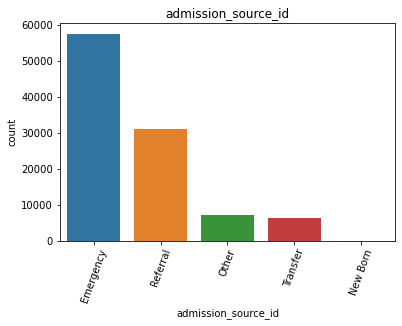

Emergency    57494
Referral     30856
Other         7083
Transfer      6328
New Born         5
Name: admission_source_id, dtype: int64


In [31]:
#Agrupar las categorias de la variable Admission source id
admission_source_id = {'Physician Referral': 'Referral', 'Clinic Referral': 'Referral', 'HMO Referral': 'Referral', 'Transfer from a hospital': 'Transfer', 'Transfer from a Skilled Nursing Facility (SNF)': 'Transfer',
                       'Transfer from another health care facility': 'Transfer', 'Emergency Room': 'Emergency', 'Court/Law Enforcement': 'Other', 'Not Available': 'Other', 'Transfer from critial access hospital': 'Transfer',
                       'Normal Delivery': 'New Born', 'Premature Delivery': 'New Born', 'Sick Baby': 'New Born', 'Extramural Birth': 'New Born', 'Not Available': 'Other', 'NULL': 'Other',
                       'Transfer From Another Home Health Agency': 'Transfer', 'Readmission to Same Home Health Agency': 'Transfer', 'Not Mapped': 'Other', 'Unknown/Invalid': 'Other', 
                       'Transfer from hospital inpt/same fac reslt in a sep claim': 'Transfer','Born inside this hospital': 'New Born', 'Born outside this hospital': 'New Born', 'Transfer from Ambulatory Surgery Center': 'Transfer', 
                       'Transfer from Hospice': 'Transfer'}

df2.admission_source_id = df2.admission_source_id.replace(admission_source_id)
plot_diagrams("admission_source_id", df2)

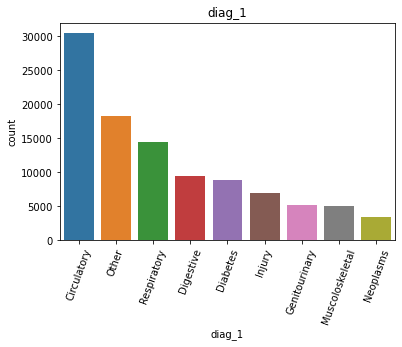

Circulatory        30437
Other              18193
Respiratory        14423
Digestive           9475
Diabetes            8757
Injury              6974
Genitourinary       5117
Muscoloskeletal     4957
Neoplasms           3433
Name: diag_1, dtype: int64


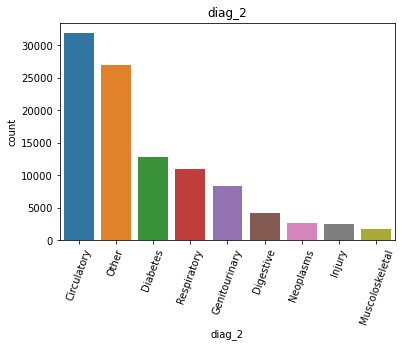

Circulatory        31881
Other              26911
Diabetes           12794
Respiratory        10895
Genitourinary       8376
Digestive           4170
Neoplasms           2547
Injury              2428
Muscoloskeletal     1764
Name: diag_2, dtype: int64


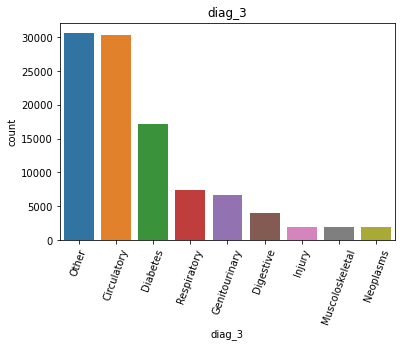

Other              30618
Circulatory        30306
Diabetes           17157
Respiratory         7358
Genitourinary       6680
Digestive           3930
Injury              1946
Muscoloskeletal     1915
Neoplasms           1856
Name: diag_3, dtype: int64


In [32]:
#Agrupar las categorias de la variable Diag_1, Diag_2, Diag_3
diag_cols = ["diag_1","diag_2","diag_3"]

for col in diag_cols:
    df2["tmp_diag"] = -1
    df2.loc[(df2[col].str.contains("V")) | (df2[col].str.contains("E")), col] = -1
    df2[col] = df2[col].astype(np.float16)
    
    df2.loc[(df2[col]>=390) & (df2[col]<=459) | (df2[col]==785), "tmp_diag"] = "Circulatory"
    df2.loc[(df2[col]>=460) & (df2[col]<=519) | (df2[col]==786), "tmp_diag"] = "Respiratory"
    df2.loc[(df2[col]>=520) & (df2[col]<=579) | (df2[col]==787), "tmp_diag"] = "Digestive"
    df2.loc[(df2[col]>=250) & (df2[col]<251), "tmp_diag"] = "Diabetes"
    df2.loc[(df2[col]>=800) & (df2[col]<=999), "tmp_diag"] = "Injury"
    df2.loc[(df2[col]>=710) & (df2[col]<=739), "tmp_diag"] = "Muscoloskeletal"
    df2.loc[(df2[col]>=580) & (df2[col]<=629) | (df2[col] == 788), "tmp_diag"] = "Genitourinary"
    df2.loc[(df2[col]>=140) & (df2[col]<=239), "tmp_diag"] = "Neoplasms"

    df2["tmp_diag"] = df2["tmp_diag"].replace({-1: 'Other'})
    df2[col] = df2["tmp_diag"]
    df2 = df2.drop("tmp_diag", axis=1)

    
#Dibujar la distribucion final de diag_1, diag_2 y diag_3
for col in diag_cols:
    plot_diagrams(col, df2)

In [33]:
#Eliminar las columnas con un 95% o más de los datos en todas las instancias iguales
df2 = df2.drop(['examide', 'citoglipton', 'acetohexamide', 'troglitazone', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1)

In [34]:
#Eliminar los identificadores del encuentro y del paciente
df2 = df2.drop(['patient_nbr','encounter_id'], axis=1)

In [35]:
#One hot encoding
df2_data = pd.get_dummies(df2)

df2_data.shape

(101766, 135)

In [36]:
##Normalizar las variables numericas
numeric = df2_data[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]
sc = StandardScaler()
numericSC = pd.DataFrame(sc.fit_transform(numeric),columns=numeric.columns)

#Unir las variables numericas normalizadas con las categoricas una vez aplicadas One-Hot Encoding
categorical = df2_data[df2_data.drop(numeric.columns,axis=1).columns]
df2_dataScaled = pd.concat([numericSC, categorical], axis=1, join='inner')

In [37]:
#Guardar el 50% de los datos para usar posteriormente en el BIRCH
df2_sample = df2_dataScaled.sample(frac=0.5, replace=False, random_state=1234)
df2_sample.shape

(50883, 135)

# Modelado

## Metodo del codo

In [38]:
def plot_elbow_method(data):
    inertia = []
    K = range(1,20)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        inertia.append(kmeanModel.inertia_)

    print(inertia)
    plt.figure(figsize=(16,8))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inercia')
    plt.show()

[49137699.960753106, 23790328.71793543, 15699848.966186862, 12970840.879005186, 11138893.229710137, 9696972.307115728, 8843029.868425429, 8134602.380620157, 7605580.259289146, 7168275.964559381, 6792819.275112529, 6486862.424346145, 6187560.178785994, 5978686.267812036, 5782310.577545431, 5594408.514652644, 5437707.234871368, 5282813.402888561, 5148596.991494006]


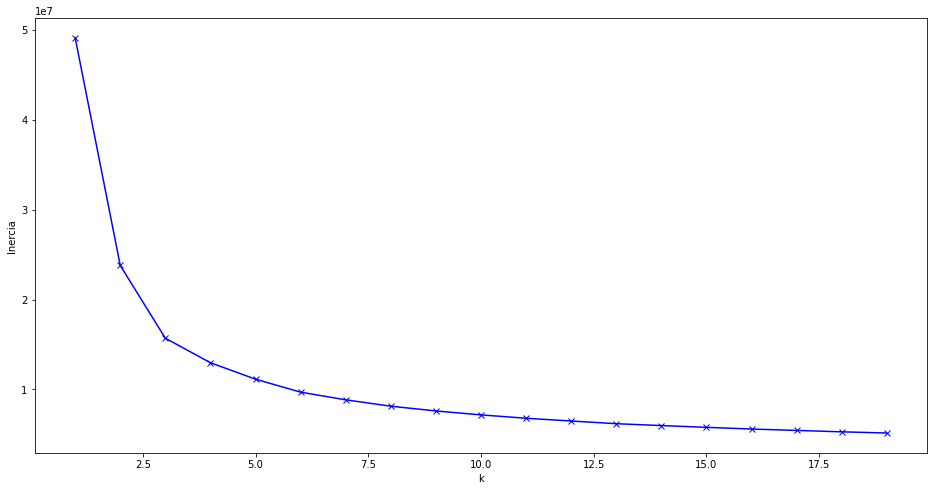

In [47]:
#Version 1
plot_elbow_method(df1_data)

[49029005.29534422, 23682346.727613967, 15591784.882228386, 12863032.573599812, 11047396.524752896, 9588936.305791304, 8734988.662963536, 8026597.315282323, 7497454.086004421, 7060504.673224319, 6682439.216048544, 6378672.823428408, 6079372.847276219, 5867633.211270093, 5674733.902652159, 5482527.651896993, 5329298.635403391, 5183865.540955387, 5038690.82762756]


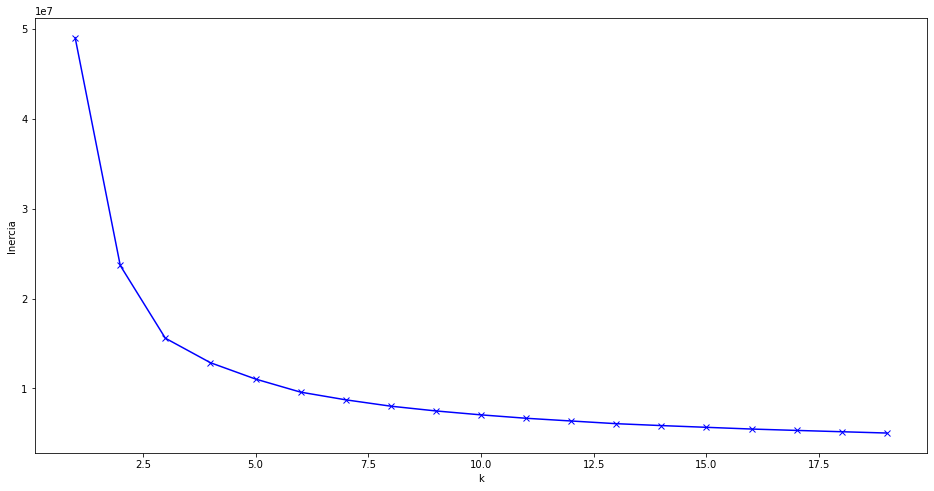

In [49]:
#Version 2
plot_elbow_method(df2_data)

## K-Means

In [39]:
def get_best_kmeans_model(data,data_org, n_clusters, n_init_list, max_iter_list):
    
    t = Texttable()
    t.header(['K', 'n_init', 'max_iter', 'Índice Silhouette', 'Índice Calinski-Harabasz', 'Clústeres'])
    t.set_cols_align(["c","c","c","c","c","c"])
    t.set_cols_width([5,8,8,20,25,40])
    
    for n_init in n_init_list:
        for max_iter in max_iter_list:
            print("n_init:",n_init,"max_iter:",max_iter)
            model = KMeans(n_clusters=n_clusters, init='k-means++', n_init=n_init, max_iter=max_iter, random_state=1234)
            pred = model.fit_predict(data)
            score_silhouette = silhouette_score(data_org, pred,metric='euclidean')
            score_calinski = calinski_harabasz_score(data_org, pred)
            print("score:",score_silhouette)
            unique, counts = np.unique(pred, return_counts=True)
            t.add_row([n_clusters, n_init, max_iter, score_silhouette,score_calinski, dict(zip(unique, counts))])
                
    
    print(t.draw())

### Versión 1

#### K = 2

In [142]:
#2 horas
get_best_kmeans_model(df1_dataScaled, df1_data, 2, [5,10,15,20], [10,50,100,200])

n_init: 5 max_iter: 10
score: 0.18681785319764338
n_init: 5 max_iter: 50
score: 0.1866795161137053
n_init: 5 max_iter: 100
score: 0.1866795161137053
n_init: 5 max_iter: 200
score: 0.1866795161137053
n_init: 10 max_iter: 10
score: 0.18681785319764338
n_init: 10 max_iter: 50
score: 0.1866745887717284
n_init: 10 max_iter: 100
score: 0.1866745887717284
n_init: 10 max_iter: 200
score: 0.1866745887717284
n_init: 15 max_iter: 10
score: 0.18681785319764338
n_init: 15 max_iter: 50
score: 0.1866745887717284
n_init: 15 max_iter: 100
score: 0.1866745887717284
n_init: 15 max_iter: 200
score: 0.1866745887717284
n_init: 20 max_iter: 10
score: 0.18681785319764338
n_init: 20 max_iter: 50
score: 0.18669376656122388
n_init: 20 max_iter: 100
score: 0.18669376656122388
n_init: 20 max_iter: 200
score: 0.18669376656122388
+-------+----------+----------+----------------------+---------------------------+------------------------------------------+
|   K   |  n_init  | max_iter |  Índice Silhouette   | Índice C

In [45]:
model1k2 = KMeans(n_clusters=2, init='k-means++', n_init=20, max_iter=50, random_state=1234)
pred1k2 = model1k2.fit_predict(df1_dataScaled)
unique, counts = np.unique(pred1k2, return_counts=True)
print(dict(zip(unique, counts)))
print(model1k2.n_iter_)

{0: 63203, 1: 38563}
17


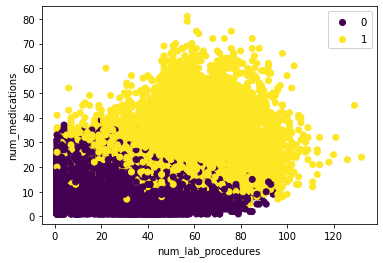

In [107]:
plot_clusters(df1, pred1k2, 7, 9)

#### K = 3

In [48]:
#2 horas
get_best_kmeans_model(df1_dataScaled, df1_data, 3, [5,10,15,20], [10,50,100,200])

n_init: 5 max_iter: 10
score: 0.0652746800705179
n_init: 5 max_iter: 50
score: 0.06396182036505152
n_init: 5 max_iter: 100
score: 0.06396182036505152
n_init: 5 max_iter: 200
score: 0.06396182036505152
n_init: 10 max_iter: 10
score: 0.0652746800705179
n_init: 10 max_iter: 50
score: 0.06396182036505152
n_init: 10 max_iter: 100
score: 0.06396182036505152
n_init: 10 max_iter: 200
score: 0.06396182036505152
n_init: 15 max_iter: 10
score: 0.0652746800705179
n_init: 15 max_iter: 50
score: 0.06400355848207227
n_init: 15 max_iter: 100
score: 0.06400355848207227
n_init: 15 max_iter: 200
score: 0.06400355848207227
n_init: 20 max_iter: 10
score: 0.0652746800705179
n_init: 20 max_iter: 50
score: 0.06400355848207227
n_init: 20 max_iter: 100
score: 0.06400355848207227
n_init: 20 max_iter: 200
score: 0.06400355848207227
+-------+----------+----------+----------------------+---------------------------+------------------------------------------+
|   K   |  n_init  | max_iter |  Índice Silhouette   | Índ

In [79]:
model1k3 = KMeans(n_clusters=3, init='k-means++', n_init=5, max_iter=10, random_state=1234)
pred1k3 = model1k3.fit_predict(df1_dataScaled)
unique, counts = np.unique(pred1k3, return_counts=True)
print(dict(zip(unique, counts)))
print(model1k3.n_iter_)

{0: 9403, 1: 33212, 2: 59151}
10


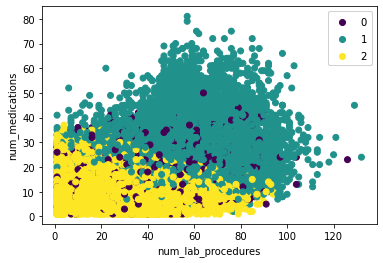

In [108]:
plot_clusters(df1, pred1k3, 7, 9)

#### K = 4

In [54]:
#2 horas
get_best_kmeans_model(df1_dataScaled, df1_data, 4, [5,10,15,20], [10,50,100,200])

n_init: 5 max_iter: 10
score: 0.007647889704163385
n_init: 5 max_iter: 50
score: 0.004456880835911515
n_init: 5 max_iter: 100
score: 0.004456880835911515
n_init: 5 max_iter: 200
score: 0.004456880835911515
n_init: 10 max_iter: 10
score: 0.007647889704163385
n_init: 10 max_iter: 50
score: 0.004456880835911515
n_init: 10 max_iter: 100
score: 0.004456880835911515
n_init: 10 max_iter: 200
score: 0.004456880835911515
n_init: 15 max_iter: 10
score: 0.007647889704163385
n_init: 15 max_iter: 50
score: 0.004434301589913901
n_init: 15 max_iter: 100
score: 0.004434301589913901
n_init: 15 max_iter: 200
score: 0.004434301589913901
n_init: 20 max_iter: 10
score: 0.007390137829427524
n_init: 20 max_iter: 50
score: 0.004434301589913901
n_init: 20 max_iter: 100
score: 0.004434301589913901
n_init: 20 max_iter: 200
score: 0.004434301589913901
+-------+----------+----------+----------------------+---------------------------+------------------------------------------+
|   K   |  n_init  | max_iter |  Índic

In [81]:
model1k4 = KMeans(n_clusters=4, init='k-means++', n_init=5, max_iter=10, random_state=1234)
pred1k4 = model1k4.fit_predict(df1_dataScaled)
unique, counts = np.unique(pred1k4, return_counts=True)
print(dict(zip(unique, counts)))
print(model1k4.n_iter_)

{0: 5130, 1: 44738, 2: 30138, 3: 21760}
10


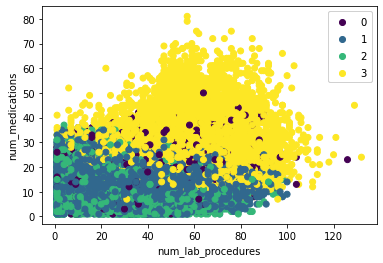

In [109]:
plot_clusters(df1, pred1k4, 7, 9)

### Versión 2

#### K = 2

In [46]:
#50 minutos
get_best_kmeans_model(df2_dataScaled, df2_data, 2, [5,10,15,20], [10,50,100,200])

n_init: 5 max_iter: 10
score: 0.1880964526222131
n_init: 5 max_iter: 50
score: 0.18801242567135068
n_init: 5 max_iter: 100
score: 0.18801242567135068
n_init: 5 max_iter: 200
score: 0.18801242567135068
n_init: 10 max_iter: 10
score: 0.1880964526222131
n_init: 10 max_iter: 50
score: 0.18796899030010594
n_init: 10 max_iter: 100
score: 0.18796899030010594
n_init: 10 max_iter: 200
score: 0.18796899030010594
n_init: 15 max_iter: 10
score: 0.1880964526222131
n_init: 15 max_iter: 50
score: 0.18796899030010594
n_init: 15 max_iter: 100
score: 0.18796899030010594
n_init: 15 max_iter: 200
score: 0.18796899030010594
n_init: 20 max_iter: 10
score: 0.1880964526222131
n_init: 20 max_iter: 50
score: 0.18796899030010594
n_init: 20 max_iter: 100
score: 0.18796899030010594
n_init: 20 max_iter: 200
score: 0.18796899030010594
+-------+----------+----------+----------------------+---------------------------+------------------------------------------+
|   K   |  n_init  | max_iter |  Índice Silhouette   | Índ

In [43]:
model2k2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=50, random_state=1234)
pred2k2 = model2k2.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k2, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k2.n_iter_)

{0: 37969, 1: 63797}
15


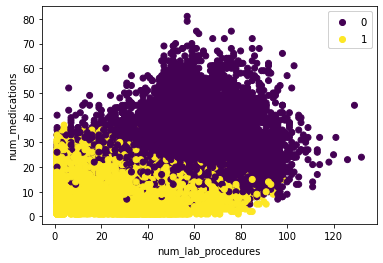

In [134]:
plot_clusters(df2, pred2k2, 7, 9)

#### K = 3

In [51]:
#50 minutos
get_best_kmeans_model(df2_dataScaled, df2_data, 3, [5,10,15,20], [10,50,100,200])

n_init: 5 max_iter: 10
score: 0.058351135007812055
n_init: 5 max_iter: 50
score: 0.06377387106881452
n_init: 5 max_iter: 100
score: 0.06377387106881452
n_init: 5 max_iter: 200
score: 0.06377387106881452
n_init: 10 max_iter: 10
score: 0.058351135007812055
n_init: 10 max_iter: 50
score: 0.06377387106881452
n_init: 10 max_iter: 100
score: 0.06377387106881452
n_init: 10 max_iter: 200
score: 0.06377387106881452
n_init: 15 max_iter: 10
score: 0.058351135007812055
n_init: 15 max_iter: 50
score: 0.06458488493183169
n_init: 15 max_iter: 100
score: 0.06458488493183169
n_init: 15 max_iter: 200
score: 0.06458488493183169
n_init: 20 max_iter: 10
score: 0.058351135007812055
n_init: 20 max_iter: 50
score: 0.06458488493183169
n_init: 20 max_iter: 100
score: 0.06458488493183169
n_init: 20 max_iter: 200
score: 0.06458488493183169
+-------+----------+----------+----------------------+---------------------------+------------------------------------------+
|   K   |  n_init  | max_iter |  Índice Silhouette

In [48]:
model2k3 = KMeans(n_clusters=3, init='k-means++', n_init=15, max_iter=50, random_state=1234)
pred2k3 = model2k3.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k3, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k3.n_iter_)

{0: 9370, 1: 60418, 2: 31978}
26


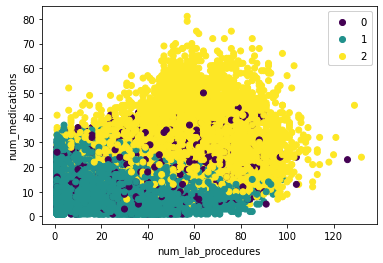

In [136]:
plot_clusters(df2, pred2k3, 7, 9)

#### K = 4

In [52]:
#50 minutos
get_best_kmeans_model(df2_dataScaled, df2_data, 4, [5,10,15,20], [10,50,100,200])

n_init: 5 max_iter: 10
score: 0.11378576675808005
n_init: 5 max_iter: 50
score: 0.004121868500570705
n_init: 5 max_iter: 100
score: 0.004120775097153462
n_init: 5 max_iter: 200
score: 0.004120775097153462
n_init: 10 max_iter: 10
score: 0.005495801395937788
n_init: 10 max_iter: 50
score: 0.00391999523945115
n_init: 10 max_iter: 100
score: 0.00391999523945115
n_init: 10 max_iter: 200
score: 0.00391999523945115
n_init: 15 max_iter: 10
score: 0.005495801395937788
n_init: 15 max_iter: 50
score: 0.00391999523945115
n_init: 15 max_iter: 100
score: 0.00391999523945115
n_init: 15 max_iter: 200
score: 0.00391999523945115
n_init: 20 max_iter: 10
score: 0.005495801395937788
n_init: 20 max_iter: 50
score: 0.003935054175970244
n_init: 20 max_iter: 100
score: 0.003935054175970244
n_init: 20 max_iter: 200
score: 0.003935054175970244
+-------+----------+----------+----------------------+---------------------------+------------------------------------------+
|   K   |  n_init  | max_iter |  Índice Silho

In [137]:
model2k4 = KMeans(n_clusters=4, init='k-means++', n_init=5, max_iter=10, random_state=1234)
pred2k4 = model2k4.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k4, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k4.n_iter_)

{0: 8544, 1: 23466, 2: 27909, 3: 41847}
10


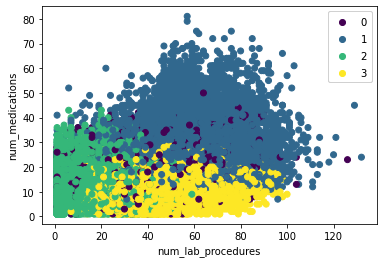

In [141]:
plot_clusters(df2, pred2k4, 7, 9)

## Gaussian mixture

In [40]:
def get_best_gaussian_model(data, data_org, n_components, max_iter_list, covariance_type_list):
    
    t = Texttable()
    t.header(['K', 'max_iter', 'covariance_type', 'Índice Silhouette','Índice Calinski-harabasz', 'Clústeres'])
    t.set_cols_align(["c","c","c","c","c","c"])
    t.set_cols_width([2,8,15,17,24,40])

    for max_iter in max_iter_list:
        for covariance_type in covariance_type_list:
            print('max_iter:',max_iter,'covariance_type:',covariance_type)
            model = GaussianMixture(n_components=n_components, max_iter=max_iter, covariance_type=covariance_type, random_state=1234)
            pred = model.fit_predict(data)
            unique, counts = np.unique(pred, return_counts=True)
            score_silhouette = None
            score_calinski= None
            
            if (len(unique) > 1):
                score_silhouette = silhouette_score(data_org, pred, metric='euclidean')
                score_calinski = calinski_harabasz_score(data_org, pred)
            
            print('score:',score_silhouette)
            t.add_row([n_components, max_iter, covariance_type, score_silhouette, score_calinski, dict(zip(unique, counts))])

    
    print(t.draw())

### Versión 1

#### K = 2

In [57]:
#3 horas
get_best_gaussian_model(df1_dataScaled,df1_data,2,[10,50,100,200],['full','tied','diag','spherical'])

max_iter: 10 covariance_type: full
score: 0.013097312978255518
max_iter: 10 covariance_type: tied


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.1317241484636129
max_iter: 10 covariance_type: diag


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.013332739291178567
max_iter: 10 covariance_type: spherical


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.15231103412753394
max_iter: 50 covariance_type: full
score: 0.013097312978255518
max_iter: 50 covariance_type: tied
score: 0.012715570876625918
max_iter: 50 covariance_type: diag
score: 0.013332739291178567
max_iter: 50 covariance_type: spherical
score: 0.1523978744233211
max_iter: 100 covariance_type: full
score: 0.013097312978255518
max_iter: 100 covariance_type: tied
score: 0.012715570876625918
max_iter: 100 covariance_type: diag
score: 0.013332739291178567
max_iter: 100 covariance_type: spherical
score: 0.1523978744233211
max_iter: 200 covariance_type: full
score: 0.013097312978255518
max_iter: 200 covariance_type: tied
score: 0.012715570876625918
max_iter: 200 covariance_type: diag
score: 0.013332739291178567
max_iter: 200 covariance_type: spherical
score: 0.1523978744233211
+----+----------+-----------------+-------------------+--------------------------+------------------------------------------+
| K  | max_iter | covariance_type | Índice Silhouette | Índice Calinski-ha

In [116]:
model1k2 = GaussianMixture(n_components=2, max_iter=50, covariance_type='spherical', random_state=1234)
pred1k2 = model1k2.fit_predict(df1_dataScaled)
unique, counts = np.unique(pred1k2, return_counts=True)
print(dict(zip(unique, counts)))
print(model1k2.n_iter_)

{0: 71129, 1: 30637}
14


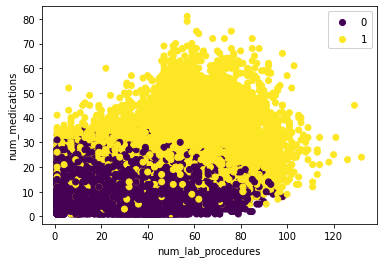

In [117]:
plot_clusters(df1, pred1k2, 7, 9)

#### K = 3

In [46]:
#3 horas
get_best_gaussian_model(df1_dataScaled,df1_data,3,[10,50,100,200],['full','tied','diag','spherical'])

max_iter: 10 covariance_type: full


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.03200263524109209
max_iter: 10 covariance_type: tied


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.009016920680120246
max_iter: 10 covariance_type: diag


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.02767576372141843
max_iter: 10 covariance_type: spherical


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.02924416364284674
max_iter: 50 covariance_type: full
score: -0.03200263524109209
max_iter: 50 covariance_type: tied
score: -0.008296897118686768
max_iter: 50 covariance_type: diag
score: -0.027684053085699722
max_iter: 50 covariance_type: spherical
score: 0.11976516181222006
max_iter: 100 covariance_type: full
score: -0.03200263524109209
max_iter: 100 covariance_type: tied
score: -0.008296897118686768
max_iter: 100 covariance_type: diag
score: -0.027684053085699722
max_iter: 100 covariance_type: spherical
score: 0.11976516181222006
max_iter: 200 covariance_type: full
score: -0.03200263524109209
max_iter: 200 covariance_type: tied
score: -0.008296897118686768
max_iter: 200 covariance_type: diag
score: -0.027684053085699722
max_iter: 200 covariance_type: spherical
score: 0.11976516181222006
+----+----------+-----------------+-------------------+--------------------------+------------------------------------------+
| K  | max_iter | covariance_type | Índice Silhouette | Índice Ca

In [120]:
model1k3 = GaussianMixture(n_components=3, max_iter=50, covariance_type='spherical', random_state=1234)
pred1k3 = model1k3.fit_predict(df1_dataScaled)
unique, counts = np.unique(pred1k3, return_counts=True)
print(dict(zip(unique, counts)))
print(model1k3.n_iter_)

{0: 5236, 1: 37203, 2: 59327}
29


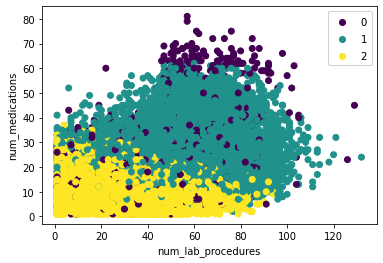

In [121]:
plot_clusters(df1, pred1k3, 7, 9)

#### K = 4

In [47]:
#3 horas
get_best_gaussian_model(df1_dataScaled,df1_data,4,[10,50,100,200],['full','tied','diag','spherical'])

max_iter: 10 covariance_type: full


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.061123949773350984
max_iter: 10 covariance_type: tied


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.015130326476857706
max_iter: 10 covariance_type: diag


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.058182088303483856
max_iter: 10 covariance_type: spherical
score: 0.011598554970608008
max_iter: 50 covariance_type: full
score: -0.061123949773350984
max_iter: 50 covariance_type: tied
score: -0.049066332552477686
max_iter: 50 covariance_type: diag
score: -0.058182088303483856
max_iter: 50 covariance_type: spherical
score: 0.011598554970608008
max_iter: 100 covariance_type: full
score: -0.061123949773350984
max_iter: 100 covariance_type: tied
score: -0.049066332552477686
max_iter: 100 covariance_type: diag
score: -0.058182088303483856
max_iter: 100 covariance_type: spherical
score: 0.011598554970608008
max_iter: 200 covariance_type: full
score: -0.061123949773350984
max_iter: 200 covariance_type: tied
score: -0.049066332552477686
max_iter: 200 covariance_type: diag
score: -0.058182088303483856
max_iter: 200 covariance_type: spherical
score: 0.011598554970608008
+----+----------+-----------------+-------------------+--------------------------+---------------------------------

In [122]:
model1k4 = GaussianMixture(n_components=4, max_iter=50, covariance_type='spherical', random_state=1234)
pred1k4 = model1k4.fit_predict(df1_dataScaled)
unique, counts = np.unique(pred1k4, return_counts=True)
print(dict(zip(unique, counts)))
print(model1k4.n_iter_)

{0: 42313, 1: 5002, 2: 29280, 3: 25171}
10


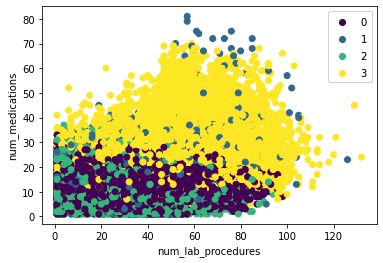

In [123]:
plot_clusters(df1, pred1k4, 7, 9)

### Versión 2

#### K = 2

In [56]:
#45 minutos
get_best_gaussian_model(df2_dataScaled,df2_data,2,[10,50,100,200],['full','tied','diag','spherical'])

max_iter: 10 covariance_type: full
score: 0.02697924660173035
max_iter: 10 covariance_type: tied


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.13918911004880466
max_iter: 10 covariance_type: diag
score: 0.029742347864238763
max_iter: 10 covariance_type: spherical


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.15496229789941482
max_iter: 50 covariance_type: full
score: 0.02697924660173035
max_iter: 50 covariance_type: tied
score: 0.12795349390139388
max_iter: 50 covariance_type: diag
score: 0.029742347864238763
max_iter: 50 covariance_type: spherical
score: 0.15521647199069805
max_iter: 100 covariance_type: full
score: 0.02697924660173035
max_iter: 100 covariance_type: tied
score: 0.12795349390139388
max_iter: 100 covariance_type: diag
score: 0.029742347864238763
max_iter: 100 covariance_type: spherical
score: 0.15521647199069805
max_iter: 200 covariance_type: full
score: 0.02697924660173035
max_iter: 200 covariance_type: tied
score: 0.12795349390139388
max_iter: 200 covariance_type: diag
score: 0.029742347864238763
max_iter: 200 covariance_type: spherical
score: 0.15521647199069805
+----+----------+-----------------+-------------------+--------------------------+------------------------------------------+
| K  | max_iter | covariance_type | Índice Silhouette | Índice Calinski-harab

In [142]:
model2k2 = GaussianMixture(n_components=2, max_iter=50, covariance_type='spherical', random_state=1234)
pred2k2 = model2k2.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k2, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k2.n_iter_)

{0: 27727, 1: 74039}
11


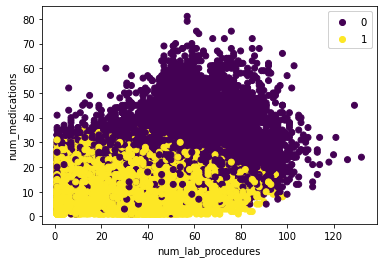

In [143]:
plot_clusters(df2, pred2k2, 7, 9)

#### K = 3

In [55]:
#45 minutos
get_best_gaussian_model(df2_dataScaled,df2_data,3,[10,50,100,200],['full','tied','diag','spherical'])

max_iter: 10 covariance_type: full
score: -0.019583526592503463
max_iter: 10 covariance_type: tied


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.007855692371543677
max_iter: 10 covariance_type: diag
score: -0.020899296214452804
max_iter: 10 covariance_type: spherical


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.02625382180515998
max_iter: 50 covariance_type: full
score: -0.019583526592503463
max_iter: 50 covariance_type: tied
score: -0.008736653290227532
max_iter: 50 covariance_type: diag
score: -0.020899296214452804
max_iter: 50 covariance_type: spherical
score: 0.11951452185902744
max_iter: 100 covariance_type: full
score: -0.019583526592503463
max_iter: 100 covariance_type: tied
score: -0.008736653290227532
max_iter: 100 covariance_type: diag
score: -0.020899296214452804
max_iter: 100 covariance_type: spherical
score: 0.11951452185902744
max_iter: 200 covariance_type: full
score: -0.019583526592503463
max_iter: 200 covariance_type: tied
score: -0.008736653290227532
max_iter: 200 covariance_type: diag
score: -0.020899296214452804
max_iter: 200 covariance_type: spherical
score: 0.11951452185902744
+----+----------+-----------------+-------------------+--------------------------+------------------------------------------+
| K  | max_iter | covariance_type | Índice Silhouette | Índice

In [144]:
model2k3 = GaussianMixture(n_components=3, max_iter=50, covariance_type='spherical', random_state=1234)
pred2k3 = model2k3.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k3, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k3.n_iter_)

{0: 34772, 1: 4858, 2: 62136}
25


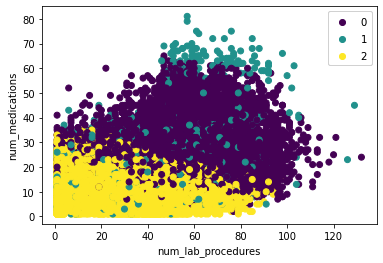

In [145]:
plot_clusters(df2, pred2k3, 7, 9)

#### K = 4

In [54]:
#45 minutos
get_best_gaussian_model(df2_dataScaled,df2_data,4,[10,50,100,200],['full','tied','diag','spherical'])

max_iter: 10 covariance_type: full
score: -0.036788875177143555
max_iter: 10 covariance_type: tied


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.04487293601465357
max_iter: 10 covariance_type: diag


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.022317609517961738
max_iter: 10 covariance_type: spherical


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.011475769230953952
max_iter: 50 covariance_type: full
score: -0.036788875177143555
max_iter: 50 covariance_type: tied
score: -0.03705567765475381
max_iter: 50 covariance_type: diag
score: -0.022325816936605597
max_iter: 50 covariance_type: spherical
score: 0.011628246223947697
max_iter: 100 covariance_type: full
score: -0.036788875177143555
max_iter: 100 covariance_type: tied
score: -0.03705567765475381
max_iter: 100 covariance_type: diag
score: -0.022325816936605597
max_iter: 100 covariance_type: spherical
score: 0.011628246223947697
max_iter: 200 covariance_type: full
score: -0.036788875177143555
max_iter: 200 covariance_type: tied
score: -0.03705567765475381
max_iter: 200 covariance_type: diag
score: -0.022325816936605597
max_iter: 200 covariance_type: spherical
score: 0.011628246223947697
+----+----------+-----------------+-------------------+--------------------------+------------------------------------------+
| K  | max_iter | covariance_type | Índice Silhouette | Índic

In [146]:
model2k4 = GaussianMixture(n_components=4, max_iter=50, covariance_type='spherical', random_state=1234)
pred2k4 = model2k4.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k4, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k4.n_iter_)

{0: 25008, 1: 4798, 2: 28982, 3: 42978}
16


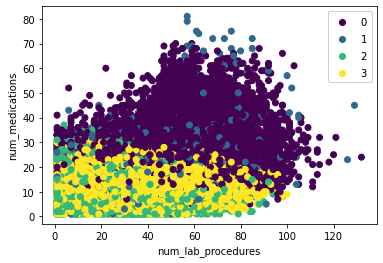

In [147]:
plot_clusters(df2, pred2k4, 7, 9)

## BIRCH

In [41]:
def get_best_birch_model(data,data_sample,data_org, n_clusters, threshold_list, branching_factor_list):
    
    t = Texttable()
    t.header(['K', 'threshold', 'branching_factor', 'Índice Silhouette','Índice Calinski-harabasz', 'Clústeres'])
    t.set_cols_align(["c","c","c","c","c","c"])
    t.set_cols_width([2,9,16,17,24,40])
    
    for threshold in threshold_list:
        for branching_factor in branching_factor_list:
            print("threshold:", threshold, "branching_factor:",branching_factor)
            model = Birch(n_clusters=n_clusters, threshold=threshold, branching_factor=branching_factor)
            model.fit(data_sample)
            pred = model.predict(data)
            unique, counts = np.unique(pred, return_counts=True)
            score_silhouette = None
            score_calinski= None
            
            if (len(unique) > 1):
                score_silhouette = silhouette_score(data_org, pred, metric='euclidean')
                score_calinski = calinski_harabasz_score(data_org, pred)
                
            print("score:",score_silhouette)
            t.add_row([n_clusters, threshold, branching_factor, score_silhouette, score_calinski, dict(zip(unique, counts))])

    print(t.draw())

### Versión 1

#### K = 2

In [46]:
#9 horas y 30 minutos
get_best_birch_model(df1_dataScaled,df1_sample,df1_data,2,[0.1,0.5,1.5,2],[50,150,500])

threshold: 0.1 branching_factor: 50
score: 0.08895792812539943
threshold: 0.1 branching_factor: 150
score: 0.08872170288685464
threshold: 0.1 branching_factor: 500
score: 0.09336622686456769
threshold: 0.5 branching_factor: 50
score: 0.09153662306159224
threshold: 0.5 branching_factor: 150
score: 0.0864129204380096
threshold: 0.5 branching_factor: 500
score: 0.1590445443546314
threshold: 1.5 branching_factor: 50
score: 0.0871023966364265
threshold: 1.5 branching_factor: 150
score: 0.0779380921421362
threshold: 1.5 branching_factor: 500
score: 0.16358235539796467
threshold: 2 branching_factor: 50
score: 0.08744435248333782
threshold: 2 branching_factor: 150
score: 0.08645612026683888
threshold: 2 branching_factor: 500
score: -0.0024747144565642797
+----+-----------+------------------+-------------------+--------------------------+------------------------------------------+
| K  | threshold | branching_factor | Índice Silhouette | Índice Calinski-harabasz |                Clústeres      

In [160]:
model1k2 = Birch(n_clusters=2, threshold=1.5, branching_factor=500)
model1k2.fit(df1_sample)
pred1k2 = model1k2.predict(df1_dataScaled)
unique, counts = np.unique(pred1k2, return_counts=True)
print(dict(zip(unique, counts)))

{0: 88963, 1: 12803}


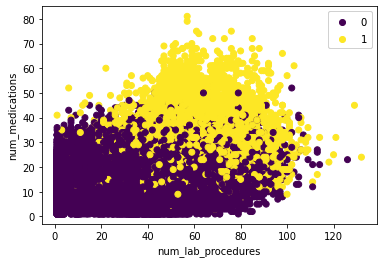

In [161]:
plot_clusters(df1, pred1k2, 7, 9)

#### k = 3

In [45]:
#9 horas y 30 minutos
get_best_birch_model(df1_dataScaled,df1_sample,df1_data,3,[0.1,0.5,1.5,2],[50,150,500])

threshold: 0.1 branching_factor: 50
score: 0.009463748483229633
threshold: 0.1 branching_factor: 150
score: 0.013680335686114022
threshold: 0.1 branching_factor: 500
score: 0.00816098435433102
threshold: 0.5 branching_factor: 50
score: 0.010154878674639562
threshold: 0.5 branching_factor: 150
score: 0.006945363335712677
threshold: 0.5 branching_factor: 500
score: 0.006942609815957839
threshold: 1.5 branching_factor: 50
score: 0.007420424209094736
threshold: 1.5 branching_factor: 150
score: 0.0073312451526400535
threshold: 1.5 branching_factor: 500
score: 0.0154009222896392
threshold: 2 branching_factor: 50
score: 0.018073203868793342
threshold: 2 branching_factor: 150
score: 0.017269021260289365
threshold: 2 branching_factor: 500
score: 0.00490616703189275
+----+-----------+------------------+-------------------+--------------------------+------------------------------------------+
| K  | threshold | branching_factor | Índice Silhouette | Índice Calinski-harabasz |                Clúst

In [162]:
model1k3 = Birch(n_clusters=3, threshold=2, branching_factor=150)
model1k3.fit(df1_sample)
pred1k3 = model1k3.predict(df1_dataScaled)
unique, counts = np.unique(pred1k3, return_counts=True)
print(dict(zip(unique, counts)))

{0: 14454, 1: 75368, 2: 11944}


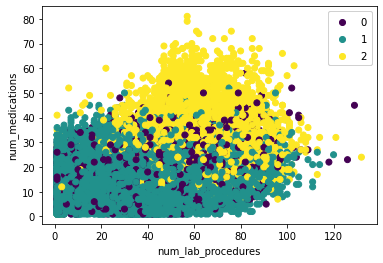

In [163]:
plot_clusters(df1, pred1k3, 7, 9)

#### K = 4

In [45]:
#9 horas y 30 minutos
get_best_birch_model(df1_dataScaled,df1_sample,df1_data,4,[0.1,0.5,1.5,2],[50,150,500])

threshold: 0.1 branching_factor: 50
score: -0.0431317192752818
threshold: 0.1 branching_factor: 150
score: -0.010145668446309989
threshold: 0.1 branching_factor: 500
score: -0.016628448185859738
threshold: 0.5 branching_factor: 50
score: -0.015742139879197523
threshold: 0.5 branching_factor: 150
score: -0.019765246369137162
threshold: 0.5 branching_factor: 500
score: -0.018960950395090357
threshold: 1.5 branching_factor: 50
score: -0.015070278682398922
threshold: 1.5 branching_factor: 150
score: -0.006195715483168327
threshold: 1.5 branching_factor: 500
score: -0.0037970348074414977
threshold: 2 branching_factor: 50
score: 0.0024942744384684238
threshold: 2 branching_factor: 150
score: -0.00311076580368766
threshold: 2 branching_factor: 500
score: -0.0063183205617914585
+----+-----------+------------------+-------------------+--------------------------+------------------------------------------+
| K  | threshold | branching_factor | Índice Silhouette | Índice Calinski-harabasz |       

In [164]:
model1k4 = Birch(n_clusters=4, threshold=2, branching_factor=50)
model1k4.fit(df1_sample)
pred1k4 = model1k4.predict(df1_dataScaled)
unique, counts = np.unique(pred1k4, return_counts=True)
print(dict(zip(unique, counts)))

{0: 8842, 1: 77895, 2: 10545, 3: 4484}


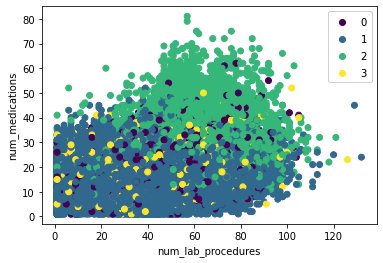

In [165]:
plot_clusters(df1, pred1k4, 7, 9)

### Versión 2

#### K = 2

In [46]:
#2 horas
get_best_birch_model(df2_dataScaled,df2_sample,df2_data,2,[0.1,0.5,1.5,2],[50,150,500])

threshold: 0.1 branching_factor: 50
score: 0.09423500701709374
threshold: 0.1 branching_factor: 150
score: 0.09186071141231084
threshold: 0.1 branching_factor: 500
score: 0.09423500701709374
threshold: 0.5 branching_factor: 50
score: 0.1776004061428608
threshold: 0.5 branching_factor: 150
score: 0.2273162691926052
threshold: 0.5 branching_factor: 500
score: 0.08869858322443716
threshold: 1.5 branching_factor: 50
score: 0.0879781405654138
threshold: 1.5 branching_factor: 150
score: 0.00016387093296875617
threshold: 1.5 branching_factor: 500
score: 0.1359791759776499
threshold: 2 branching_factor: 50
score: 0.15201320605666974
threshold: 2 branching_factor: 150
score: 0.082324235912697
threshold: 2 branching_factor: 500
score: 0.002704348894220614
+----+-----------+------------------+-------------------+--------------------------+------------------------------------------+
| K  | threshold | branching_factor | Índice Silhouette | Índice Calinski-harabasz |                Clústeres       

In [45]:
model2k2 = Birch(n_clusters=2, threshold=0.5, branching_factor=150)
model2k2.fit(df2_sample)
pred2k2 = model2k2.predict(df2_dataScaled)
unique, counts = np.unique(pred2k2, return_counts=True)
print(dict(zip(unique, counts)))

{0: 95897, 1: 5869}


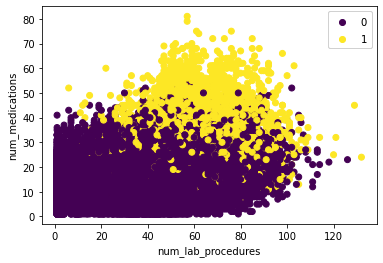

In [47]:
plot_clusters(df2, pred2k2, 7, 9)

#### k = 3

In [47]:
#2 horas
get_best_birch_model(df2_dataScaled,df2_sample,df2_data,3,[0.1,0.5,1.5,2],[50,150,500])

threshold: 0.1 branching_factor: 50
score: 0.004469218972615349
threshold: 0.1 branching_factor: 150
score: 0.005464504305543412
threshold: 0.1 branching_factor: 500
score: 0.005542192071945788
threshold: 0.5 branching_factor: 50
score: 0.012358291885076296
threshold: 0.5 branching_factor: 150
score: -0.0018764517019874674
threshold: 0.5 branching_factor: 500
score: 0.0060690021917560845
threshold: 1.5 branching_factor: 50
score: 0.017040340976294067
threshold: 1.5 branching_factor: 150
score: 0.011621685736066959
threshold: 1.5 branching_factor: 500
score: 0.01144249914653875
threshold: 2 branching_factor: 50
score: 0.015005849485297394
threshold: 2 branching_factor: 150
score: 0.011301058896591724
threshold: 2 branching_factor: 500
score: 0.017567718116167908
+----+-----------+------------------+-------------------+--------------------------+------------------------------------------+
| K  | threshold | branching_factor | Índice Silhouette | Índice Calinski-harabasz |                

In [156]:
model2k3 = Birch(n_clusters=3, threshold=1.5, branching_factor=50)
model2k3.fit(df2_sample)
pred2k3 = model2k3.predict(df2_dataScaled)
unique, counts = np.unique(pred2k3, return_counts=True)
print(dict(zip(unique, counts)))

{0: 13969, 1: 70322, 2: 17475}


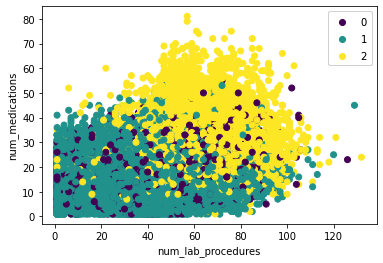

In [157]:
plot_clusters(df2, pred2k3, 7, 9)

#### k = 4

In [48]:
#2 horas
get_best_birch_model(df2_dataScaled,df2_sample,df2_data,4,[0.1,0.5,1.5,2],[50,150,500])

threshold: 0.1 branching_factor: 50
score: -0.018217149994243734
threshold: 0.1 branching_factor: 150
score: -0.017008026844309344
threshold: 0.1 branching_factor: 500
score: -0.01721423851242136
threshold: 0.5 branching_factor: 50
score: -0.030119754183757293
threshold: 0.5 branching_factor: 150
score: -0.02544082149383764
threshold: 0.5 branching_factor: 500
score: -0.013028339494193086
threshold: 1.5 branching_factor: 50
score: 0.004948802005109009
threshold: 1.5 branching_factor: 150
score: -0.002949240985125462
threshold: 1.5 branching_factor: 500
score: -0.006923670511340603
threshold: 2 branching_factor: 50
score: 0.01097266858304629
threshold: 2 branching_factor: 150
score: 0.009658154325961265
threshold: 2 branching_factor: 500
score: 0.015658680753229903
+----+-----------+------------------+-------------------+--------------------------+------------------------------------------+
| K  | threshold | branching_factor | Índice Silhouette | Índice Calinski-harabasz |             

In [158]:
model2k4 = Birch(n_clusters=4, threshold=1.5, branching_factor=50)
model2k4.fit(df2_sample)
pred2k4 = model2k4.predict(df2_dataScaled)
unique, counts = np.unique(pred2k4, return_counts=True)
print(dict(zip(unique, counts)))

{0: 9301, 1: 70322, 2: 17475, 3: 4668}


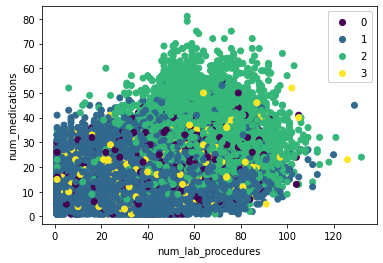

In [159]:
plot_clusters(df2, pred2k4, 7, 9)

## DBSCAN

In [42]:
def get_best_dbscan_model(data, data_org, eps_list, min_samples_list, metric):
    
    t = Texttable()
    t.header(['metric', 'eps', 'min_samples', 'Índice Silhouette', 'Índice Calinski-Harabasz', 'Clústeres'])
    t.set_cols_align(["c","c","c","c","c","c"])
    t.set_cols_width([13,8,8,20,25,30])
    
    for eps in eps_list:
        for min_samples in min_samples_list:
            print("Eps: ",eps, "min_samples: ", min_samples)
            model = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
            pred = model.fit_predict(data)
            unique, counts = np.unique(pred, return_counts=True)
            score_silhouette = None
            score_calinski= None
            if (len(unique) > 1):
                score_silhouette = silhouette_score(data_org, pred, metric='euclidean')
                score_calinski = calinski_harabasz_score(data_org, pred)
                
            print("score:",score_silhouette)
            t.add_row([metric, eps, min_samples, score_silhouette, score_calinski, dict(zip(unique, counts))])  
            
    print(t.draw())

### Versión 1

#### Euclídea

In [45]:
#3 horas
get_best_dbscan_model(df1_data, df1_data, [0.5,2,5,8,10], [100,2000,5000,10000], "euclidean")

Eps:  0.5 min_samples:  100
score: None
Eps:  0.5 min_samples:  2000
score: None
Eps:  0.5 min_samples:  5000
score: None
Eps:  0.5 min_samples:  10000
score: None
Eps:  2 min_samples:  100
score: None
Eps:  2 min_samples:  2000
score: None
Eps:  2 min_samples:  5000
score: None
Eps:  2 min_samples:  10000
score: None
Eps:  5 min_samples:  100
score: 0.16489870100605303
Eps:  5 min_samples:  2000
score: None
Eps:  5 min_samples:  5000
score: None
Eps:  5 min_samples:  10000
score: None
Eps:  8 min_samples:  100
score: 0.4233650232469611
Eps:  8 min_samples:  2000
score: 0.33253857571567713
Eps:  8 min_samples:  5000
score: 0.3048381726562592
Eps:  8 min_samples:  10000
score: 0.08088826262854554
Eps:  10 min_samples:  100
score: 0.4646630959595114
Eps:  10 min_samples:  2000
score: 0.41382552683925294
Eps:  10 min_samples:  5000
score: 0.3679803628791608
Eps:  10 min_samples:  10000
score: 0.3559970271588316
+---------------+----------+----------+----------------------+----------------

In [148]:
#6 minutos
model1Eucl = DBSCAN(eps=10, min_samples=5000, metric="euclidean")
pred1Eucl = model1Eucl.fit_predict(df1_data)
unique, counts = np.unique(pred1Eucl, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 5277, 0: 96489}


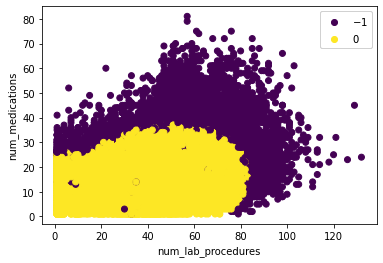

In [149]:
plot_clusters(df1, pred1Eucl, 7, 9)

### Versión 2

#### Euclídea

In [59]:
#1 hora
get_best_dbscan_model(df2_data, df2_data, [0.5,2,5,8,10], [100,2000,5000,10000], "euclidean")

Eps:  0.5 min_samples:  100
score: None
Eps:  0.5 min_samples:  2000
score: None
Eps:  0.5 min_samples:  5000
score: None
Eps:  0.5 min_samples:  10000
score: None
Eps:  2 min_samples:  100
score: None
Eps:  2 min_samples:  2000
score: None
Eps:  2 min_samples:  5000
score: None
Eps:  2 min_samples:  10000
score: None
Eps:  5 min_samples:  100
score: 0.20680272028205407
Eps:  5 min_samples:  2000
score: None
Eps:  5 min_samples:  5000
score: None
Eps:  5 min_samples:  10000
score: None
Eps:  8 min_samples:  100
score: 0.43058406135704214
Eps:  8 min_samples:  2000
score: 0.340905031785709
Eps:  8 min_samples:  5000
score: 0.31766995106321355
Eps:  8 min_samples:  10000
score: 0.1251087309609147
Eps:  10 min_samples:  100
score: 0.4661940275727521
Eps:  10 min_samples:  2000
score: 0.4176829436864174
Eps:  10 min_samples:  5000
score: 0.37254329503443234
Eps:  10 min_samples:  10000
score: 0.3625926285157258
+---------------+----------+----------+----------------------+-----------------

In [150]:
model2Eucl = DBSCAN(eps=10, min_samples=5000, metric="euclidean")
pred2Eucl = model2Eucl.fit_predict(df2_data)
unique, counts = np.unique(pred2Eucl, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 4999, 0: 96767}


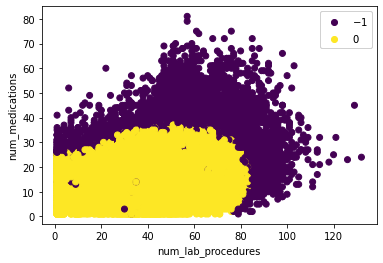

In [151]:
plot_clusters(df2, pred2Eucl, 7, 9)

#### Manhattan

In [60]:
#3 horas
get_best_dbscan_model(df2_data, df2_data, [20,25,30], [100,2000,5000,10000], "manhattan")

Eps:  20 min_samples:  100
score: 0.29769068803809023
Eps:  20 min_samples:  2000
score: 0.12351116203317691
Eps:  20 min_samples:  5000
score: None
Eps:  20 min_samples:  10000
score: None
Eps:  25 min_samples:  100
score: 0.42596766626125177
Eps:  25 min_samples:  2000
score: 0.31186111846430636
Eps:  25 min_samples:  5000
score: 0.2989724951417003
Eps:  25 min_samples:  10000
score: 0.0675645033981993
Eps:  30 min_samples:  100
score: 0.47324281218704284
Eps:  30 min_samples:  2000
score: 0.42793665632878314
Eps:  30 min_samples:  5000
score: 0.378301712766299
Eps:  30 min_samples:  10000
score: 0.3692977322626411
+---------------+----------+----------+----------------------+---------------------------+--------------------------------+
|    metric     |   eps    | min_samp |  Índice Silhouette   | Índice Calinski-Harabasz  |           Clústeres            |
|               |          |   les    |                      |                           |                                |
+==

In [152]:
model2Manh = DBSCAN(eps=30, min_samples=10000, metric="manhattan")
pred2Manh = model2Manh.fit_predict(df2_data)
unique, counts = np.unique(pred2Manh, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 16877, 0: 84889}


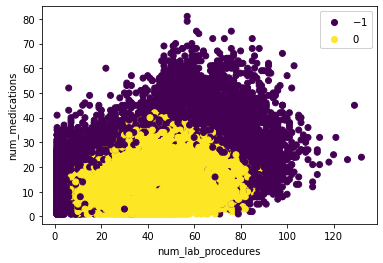

In [153]:
plot_clusters(df2, pred2Manh, 7, 9)

## Análisis de resultados

### K-means k=2 version 2

In [38]:
model2k2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=50, random_state=1234)
pred2k2 = model2k2.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k2, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k2.n_iter_)

{0: 37969, 1: 63797}
15


In [39]:
df2Copy = df2.copy()

#Añadir una nueva columna con la prediccion del k-means k=2
df2_copy = df2Copy.insert(38,"Cluster",pred2k2,True)

#Obtener las variables numericas
numeric = df2[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]

In [40]:
#Calcular las medias de cada variable numerica en cada cluster
mean_0 = []
mean_1 = []
for var in numeric:
    mean_0.append(df2Copy.groupby(['Cluster'])[var].mean().values[0])
    mean_1.append(df2Copy.groupby(['Cluster'])[var].mean().values[1])
    
print(mean_0)
print(mean_1)

[6.8230925228475865, 54.611051120651055, 2.0250467486633834, 22.40188048144539, 0.5111538360241249, 0.2904211330295768, 0.939108219863573, 8.394532381679792]
[2.9514867470257222, 36.24220574635171, 0.931861999780554, 12.224744110224618, 0.2849663777293603, 0.14273398435663118, 0.4549116729626785, 6.844161951188927]


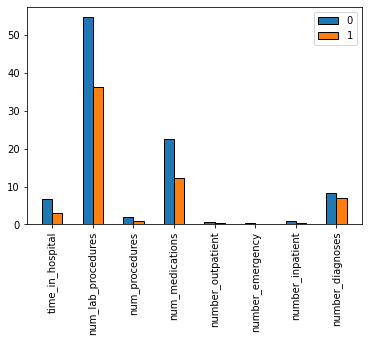

+--------------------+------------+------------+
|      Variable      | Cluster 0  | Cluster 1  |
+====================+============+============+
|  time_in_hospital  |   6.823    |   2.951    |
+--------------------+------------+------------+
| num_lab_procedures |   54.611   |   36.242   |
+--------------------+------------+------------+
|   num_procedures   |   2.025    |   0.932    |
+--------------------+------------+------------+
|  num_medications   |   22.402   |   12.225   |
+--------------------+------------+------------+
| number_outpatient  |   0.511    |   0.285    |
+--------------------+------------+------------+
|  number_emergency  |   0.290    |   0.143    |
+--------------------+------------+------------+
|  number_inpatient  |   0.939    |   0.455    |
+--------------------+------------+------------+
|  number_diagnoses  |   8.395    |   6.844    |
+--------------------+------------+------------+


In [41]:
r = np.arange(8)
width = 0.25
    
plt.bar(r, mean_0, width = width, edgecolor = 'black', label='0')
plt.bar(r + width, mean_1, width = width, edgecolor = 'black', label='1')
plt.xticks(r + width/2,numeric,rotation = 90)
plt.legend()
plt.show()

t = Texttable()
t.header(['Variable', 'Cluster 0', 'Cluster 1'])
t.set_cols_align(["c","c","c"])
t.set_cols_width([18,10,10])
i=0
for var in numeric:
    t.add_row([var, mean_0[i], mean_1[i]])
    i += 1

print(t.draw())

C:\Users\Edurne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


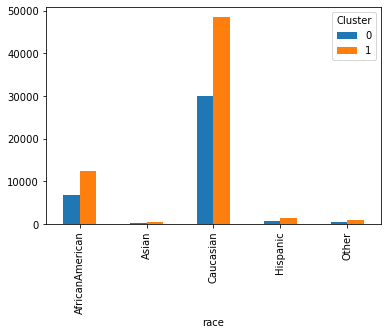

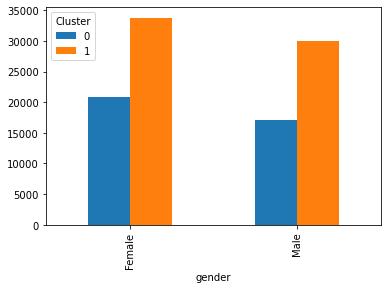

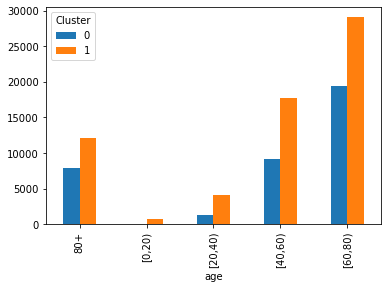

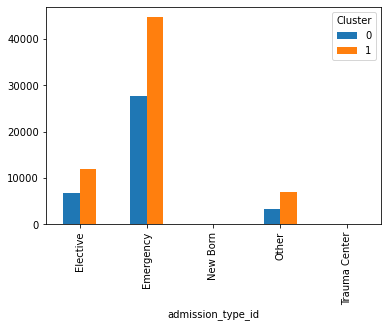

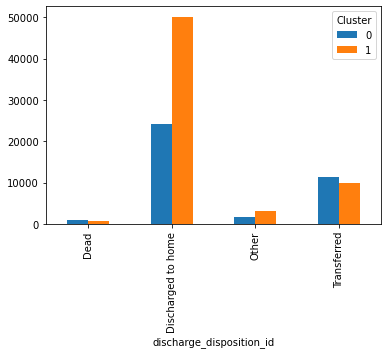

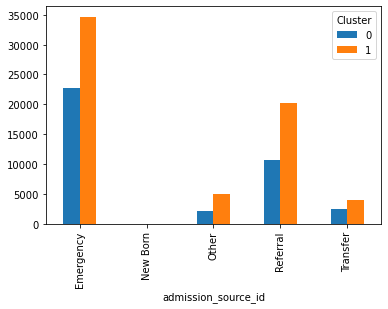

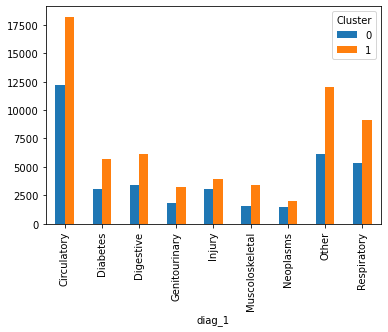

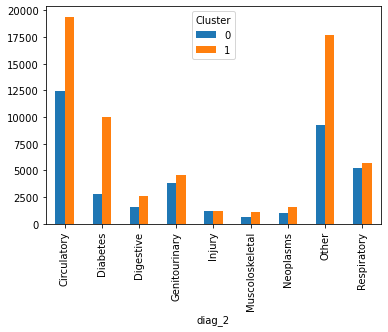

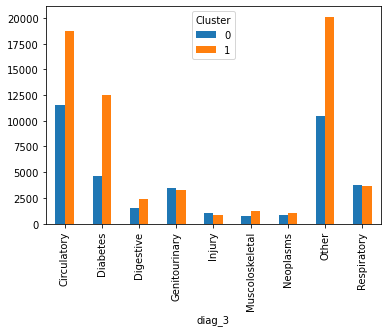

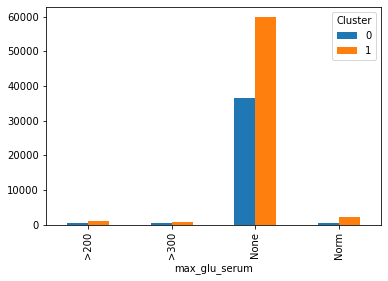

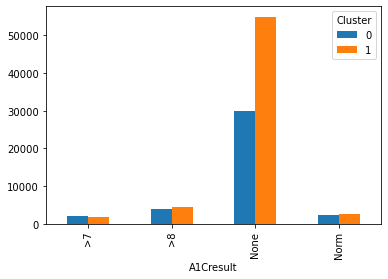

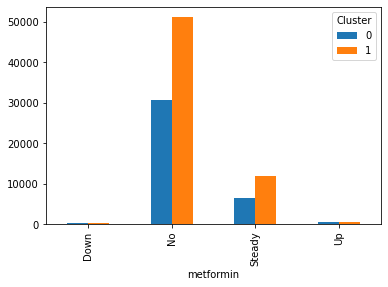

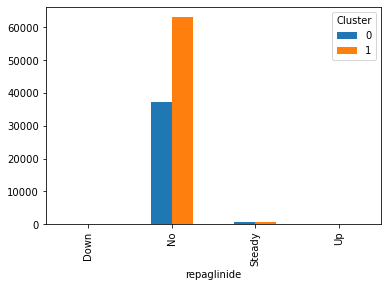

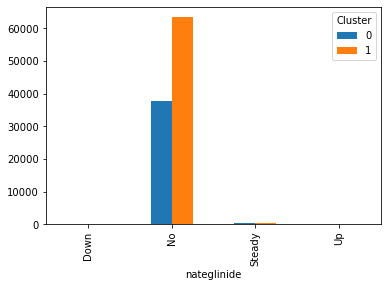

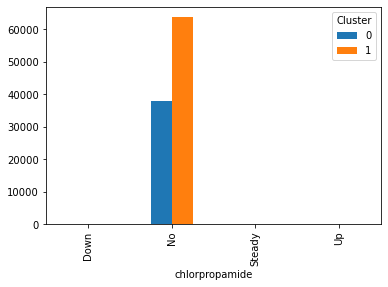

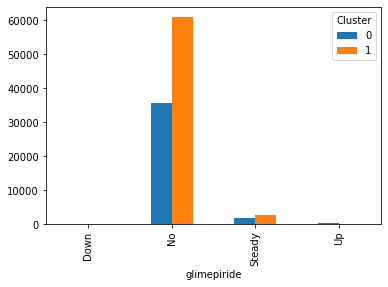

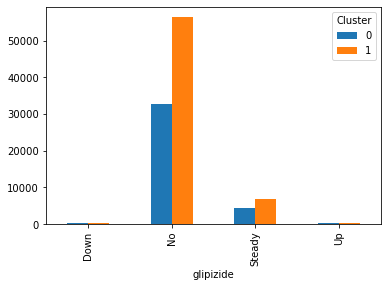

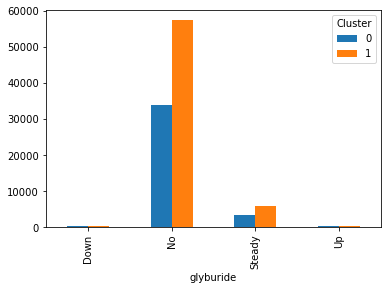

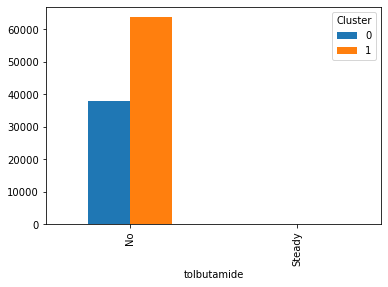

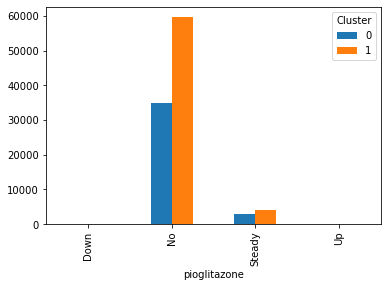

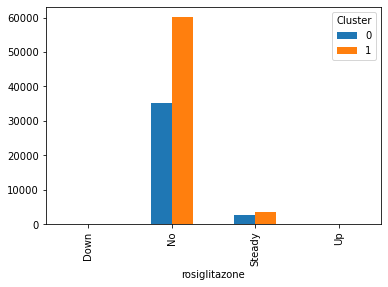

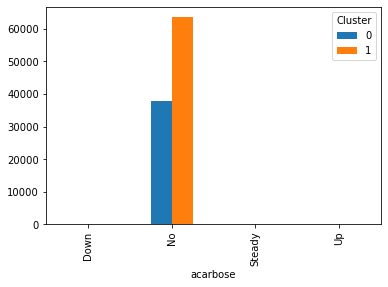

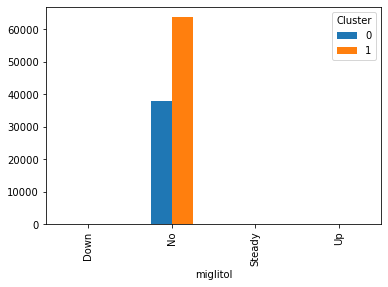

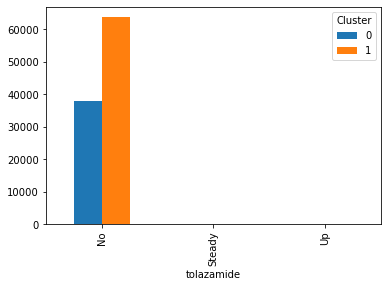

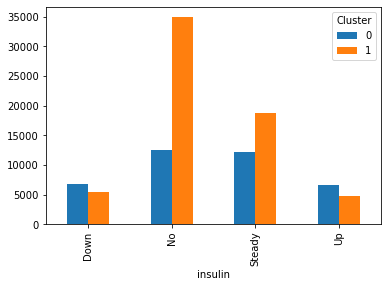

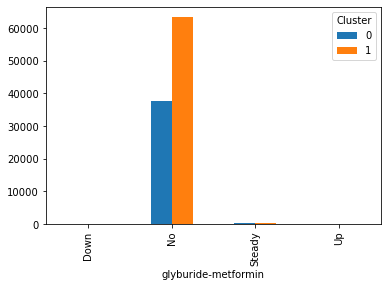

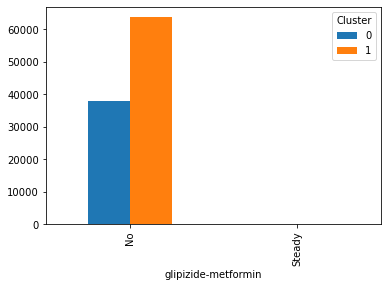

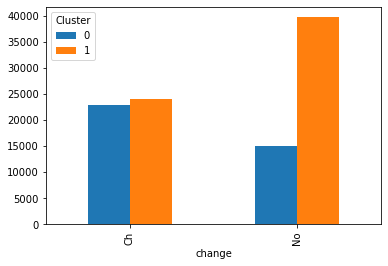

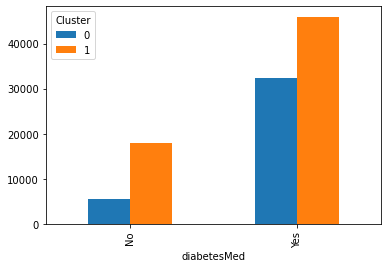

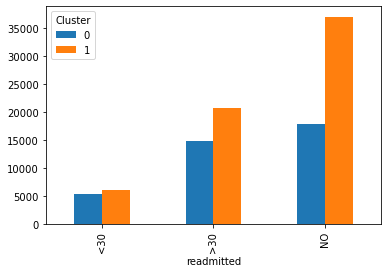

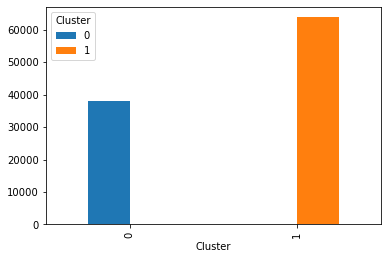

In [42]:
#Obtener las variables categoricas
categorical_df2 = df2Copy[df2Copy.drop(numeric.columns,axis=1).columns]

#Dibujar las variables categoricas 
for var in categorical_df2.columns:
    df2Copy.groupby([var])['Cluster'].value_counts().unstack().plot(kind='bar',stacked = False)

### Gaussian Mixture  k=2 version 2

In [43]:
model2k2 = GaussianMixture(n_components=2, max_iter=50, covariance_type='spherical', random_state=1234)
pred2k2 = model2k2.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k2, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k2.n_iter_)

{0: 27727, 1: 74039}
11


In [44]:
df2_gm2 = df2.copy()

df2_gm = df2_gm2.insert(38,"Cluster",pred2k2,True)

numeric = df2[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]


In [45]:
#Calcular las medias de cada variable numerica en cada cluster
mean_0 = []
mean_1 = []
for var in numeric:
    mean_0.append(df2_gm2.groupby(['Cluster'])[var].mean().values[0])
    mean_1.append(df2_gm2.groupby(['Cluster'])[var].mean().values[1])
    
print(mean_0)
print(mean_1)

[7.137843978793234, 52.202149529339636, 2.3761676344357485, 23.458325819598226, 0.8466476719443142, 0.48057849749341797, 1.2810978468640675, 8.19151008042702]
[3.3691838085333403, 39.68532800280933, 0.9515930793230595, 13.236942692364835, 0.19061575656073151, 0.09195153905374194, 0.39381947352071206, 7.134658760923297]


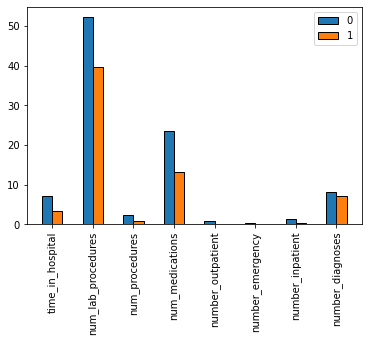

+--------------------+------------+------------+
|      Variable      | Cluster 0  | Cluster 1  |
+====================+============+============+
|  time_in_hospital  |   7.138    |   3.369    |
+--------------------+------------+------------+
| num_lab_procedures |   52.202   |   39.685   |
+--------------------+------------+------------+
|   num_procedures   |   2.376    |   0.952    |
+--------------------+------------+------------+
|  num_medications   |   23.458   |   13.237   |
+--------------------+------------+------------+
| number_outpatient  |   0.847    |   0.191    |
+--------------------+------------+------------+
|  number_emergency  |   0.481    |   0.092    |
+--------------------+------------+------------+
|  number_inpatient  |   1.281    |   0.394    |
+--------------------+------------+------------+
|  number_diagnoses  |   8.192    |   7.135    |
+--------------------+------------+------------+


In [46]:
r = np.arange(8)
width = 0.25
    
plt.bar(r, mean_0, width = width, edgecolor = 'black', label='0')
plt.bar(r + width, mean_1, width = width, edgecolor = 'black', label='1')
plt.xticks(r + width/2,numeric,rotation = 90)
plt.legend()
plt.show()

t = Texttable()
t.header(['Variable', 'Cluster 0', 'Cluster 1'])
t.set_cols_align(["c","c","c"])
t.set_cols_width([18,10,10])
i=0
for var in numeric:
    t.add_row([var, mean_0[i], mean_1[i]])
    i += 1

print(t.draw())

C:\Users\Edurne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


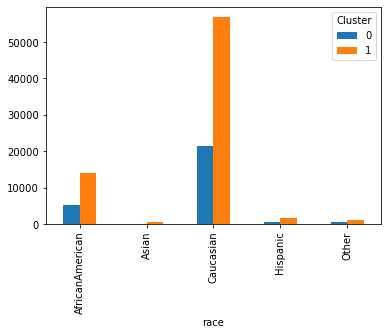

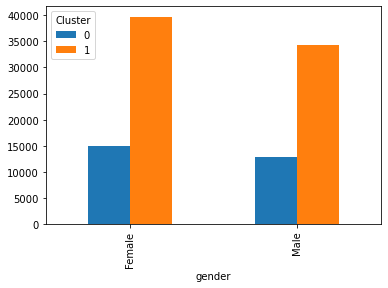

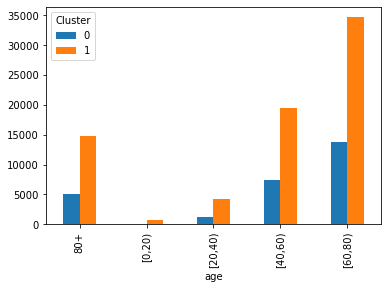

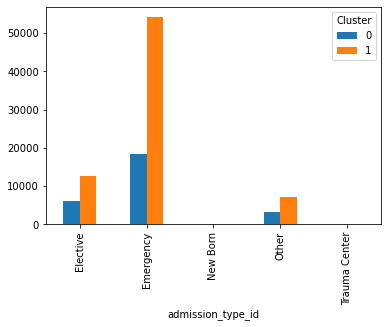

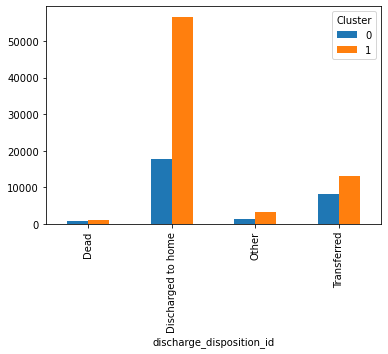

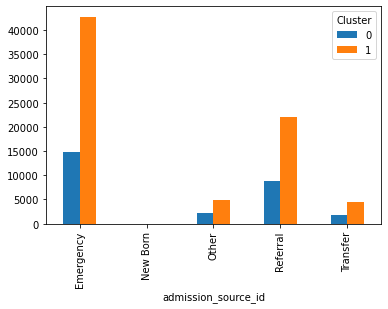

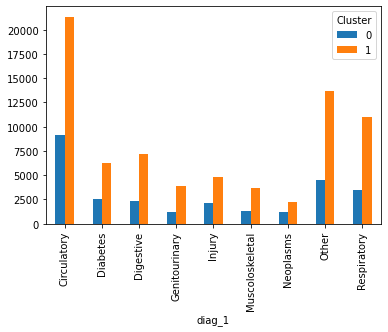

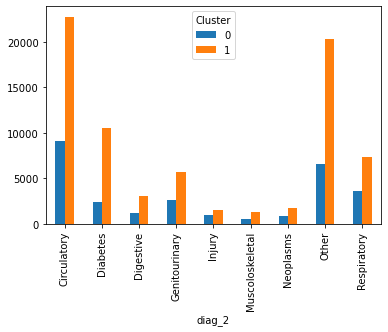

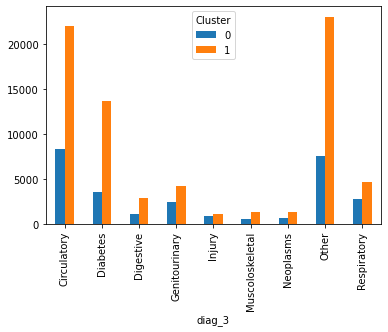

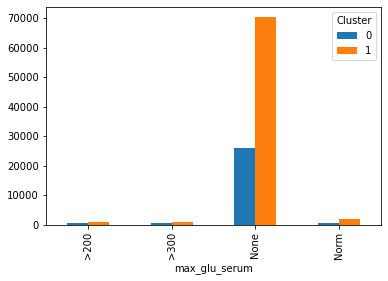

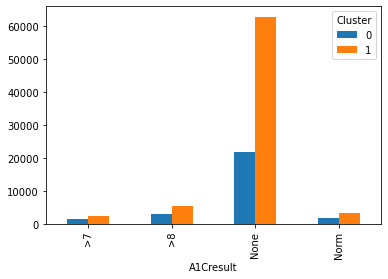

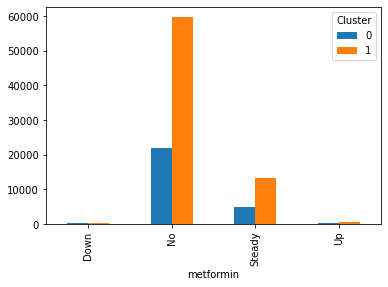

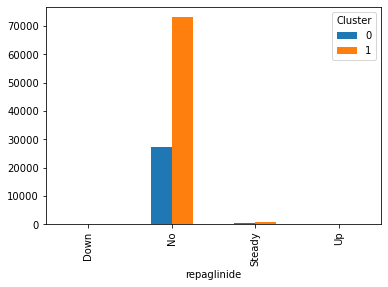

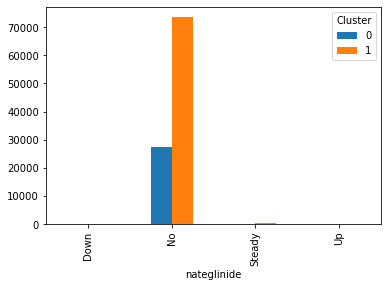

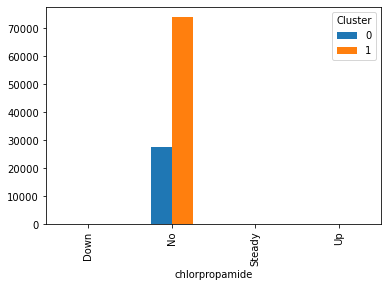

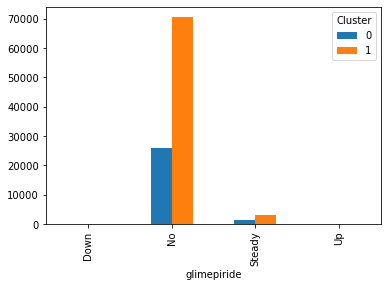

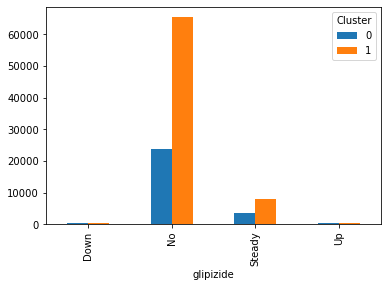

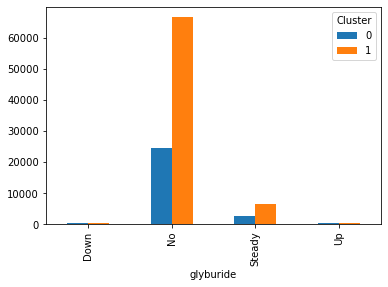

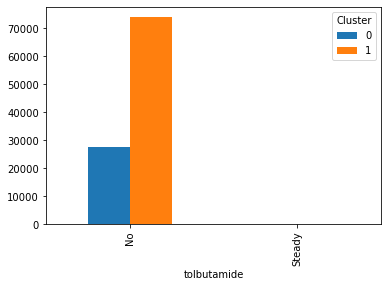

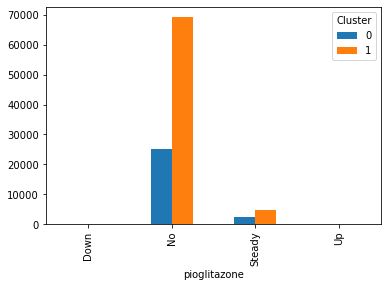

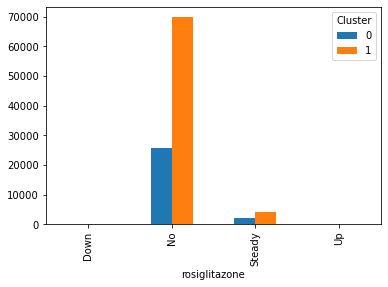

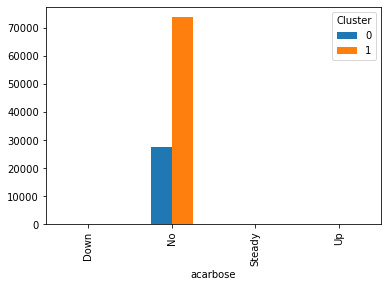

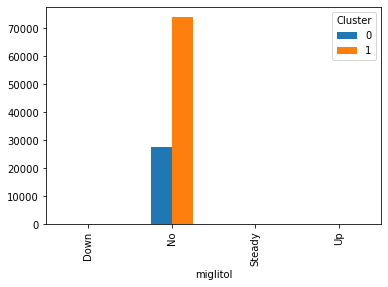

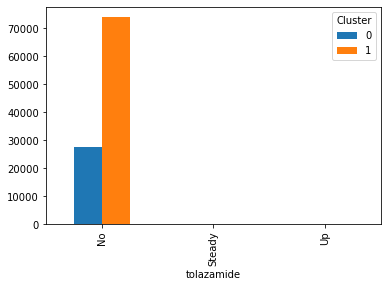

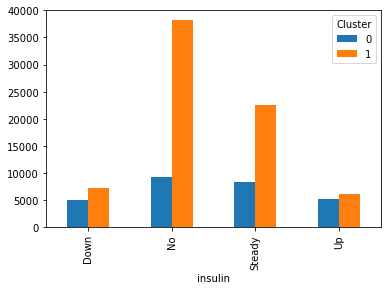

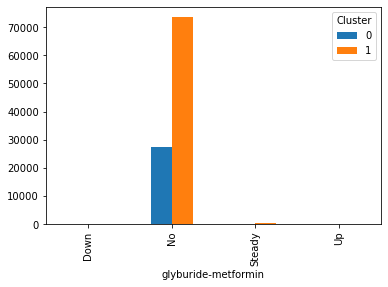

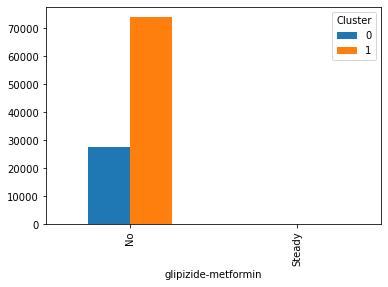

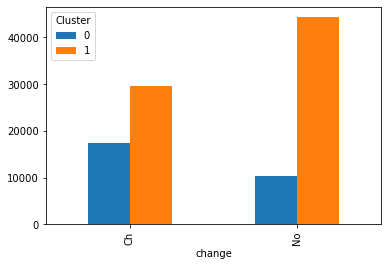

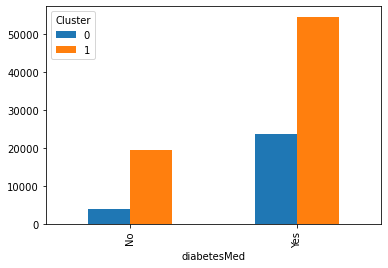

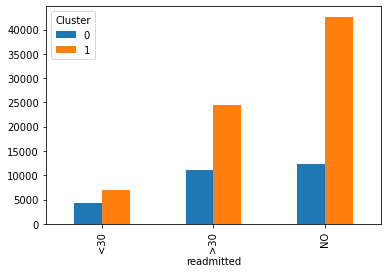

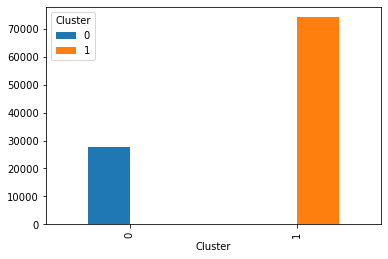

In [47]:
#Obtener las variables categoricas
categorical_df2 = df2_gm2[df2_gm2.drop(numeric.columns,axis=1).columns]

#Dibujar las variables categoricas 
for var in categorical_df2.columns:
    df2_gm2.groupby([var])['Cluster'].value_counts().unstack().plot(kind='bar',stacked = False)

### Gaussian Mixture k=3 version 2

In [48]:
model2k3 = GaussianMixture(n_components=3, max_iter=50, covariance_type='spherical', random_state=1234)
pred2k3 = model2k3.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k3, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k3.n_iter_)

{0: 34772, 1: 4858, 2: 62136}
25


In [49]:
df2_gm3 = df2.copy()

df2_gm = df2_gm3.insert(38,"Cluster",pred2k3,True)

numeric = df2[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]


In [50]:
#Calcular las medias de cada variable numerica en cada cluster
mean_0 = []
mean_1 = []
for var in numeric:
    mean_0.append(df2_gm3.groupby(['Cluster'])[var].mean().values[0])
    mean_1.append(df2_gm3.groupby(['Cluster'])[var].mean().values[1])
    
print(mean_0)
print(mean_1)

[6.933538479236167, 54.19857931669159, 2.191619694006672, 22.550816749108478, 0.2695847233406189, 0.13464856781318302, 0.6396238352697573, 8.3131255032785]
[4.617538081515026, 43.14717990942775, 1.172498970769864, 18.365582544256895, 3.030465212021408, 1.8976945244956773, 3.5421984355701936, 7.95944833264718]


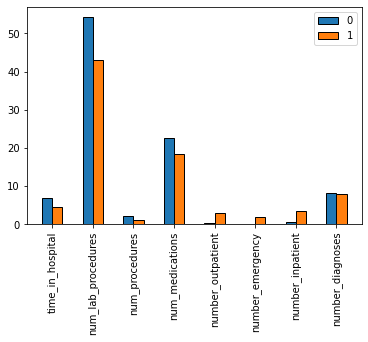

+--------------------+------------+------------+
|      Variable      | Cluster 0  | Cluster 1  |
+====================+============+============+
|  time_in_hospital  |   6.934    |   4.618    |
+--------------------+------------+------------+
| num_lab_procedures |   54.199   |   43.147   |
+--------------------+------------+------------+
|   num_procedures   |   2.192    |   1.172    |
+--------------------+------------+------------+
|  num_medications   |   22.551   |   18.366   |
+--------------------+------------+------------+
| number_outpatient  |   0.270    |   3.030    |
+--------------------+------------+------------+
|  number_emergency  |   0.135    |   1.898    |
+--------------------+------------+------------+
|  number_inpatient  |   0.640    |   3.542    |
+--------------------+------------+------------+
|  number_diagnoses  |   8.313    |   7.959    |
+--------------------+------------+------------+


In [51]:
r = np.arange(8)
width = 0.25
    
plt.bar(r, mean_0, width = width, edgecolor = 'black', label='0')
plt.bar(r + width, mean_1, width = width, edgecolor = 'black', label='1')
plt.xticks(r + width/2,numeric,rotation = 90)
plt.legend()
plt.show()

t = Texttable()
t.header(['Variable', 'Cluster 0', 'Cluster 1'])
t.set_cols_align(["c","c","c"])
t.set_cols_width([18,10,10])
i=0
for var in numeric:
    t.add_row([var, mean_0[i], mean_1[i]])
    i += 1

print(t.draw())

C:\Users\Edurne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


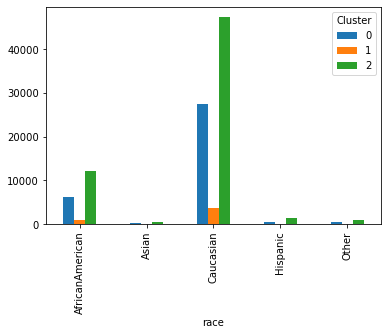

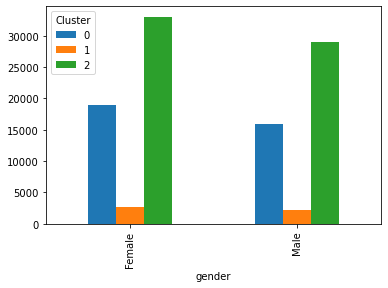

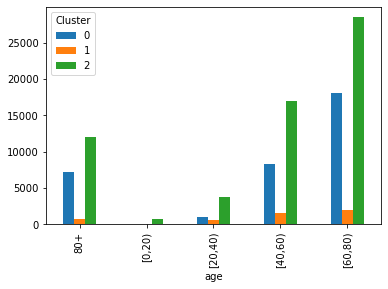

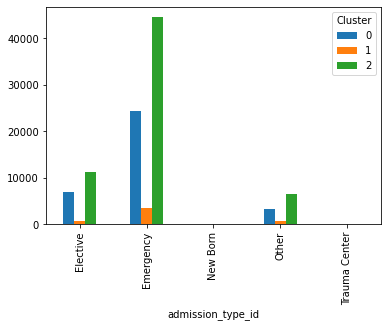

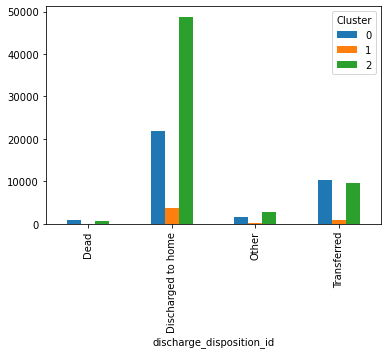

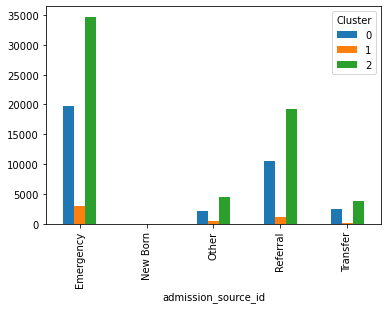

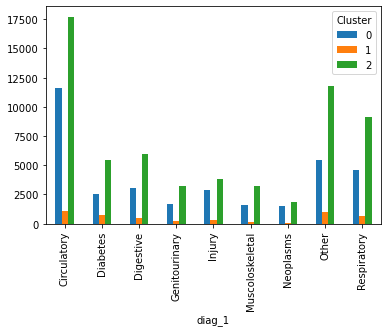

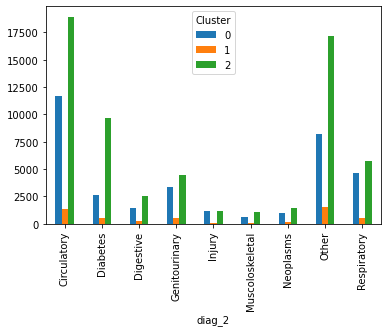

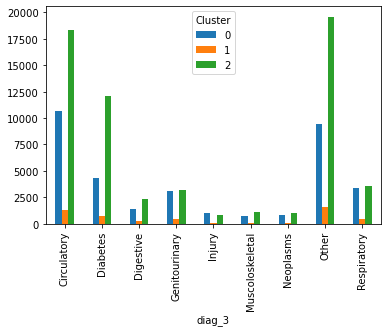

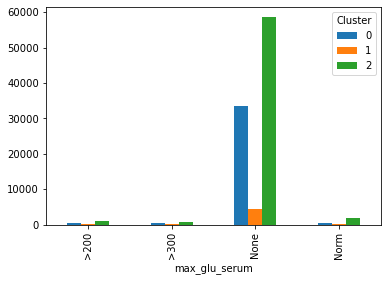

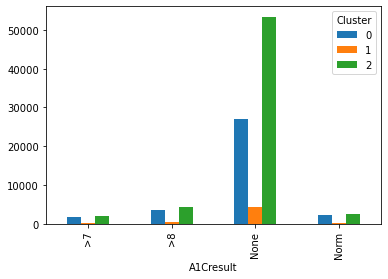

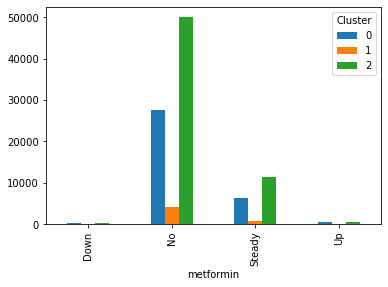

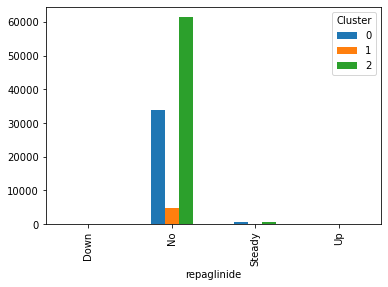

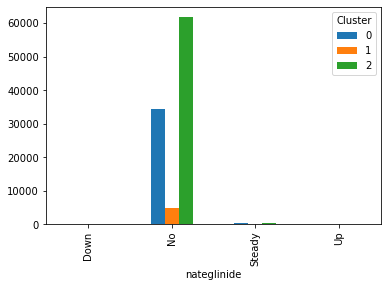

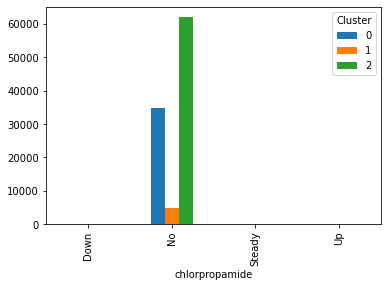

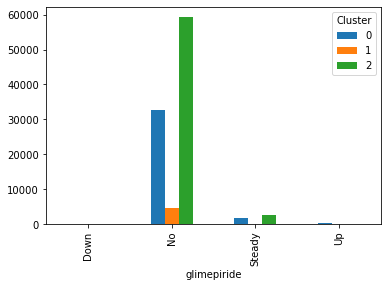

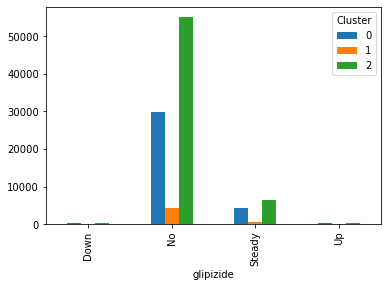

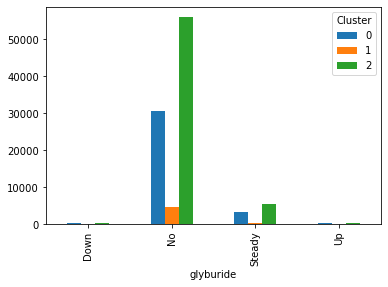

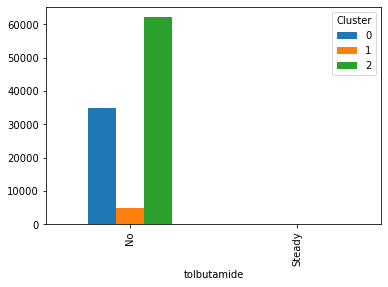

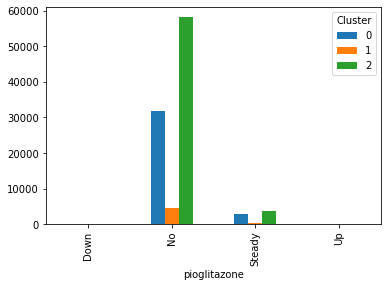

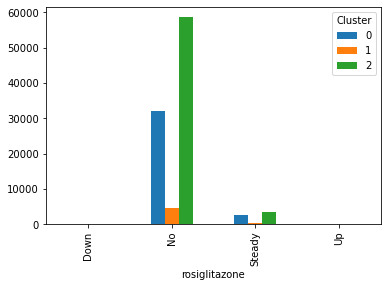

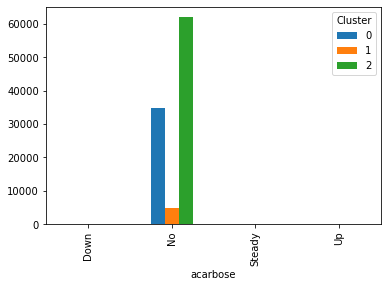

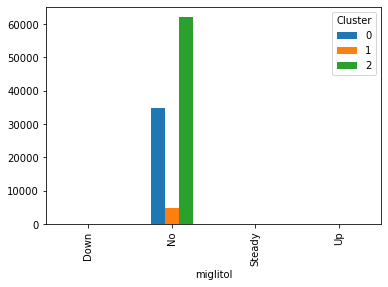

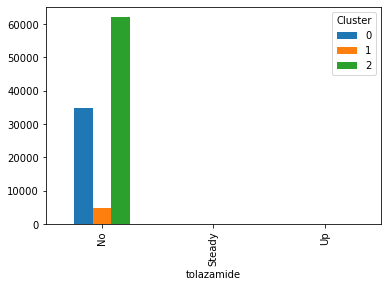

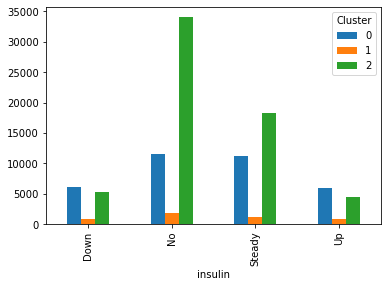

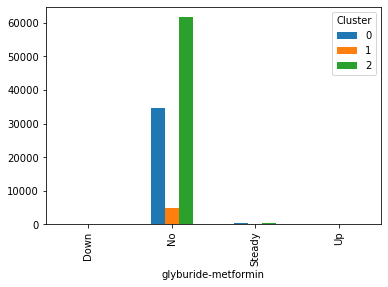

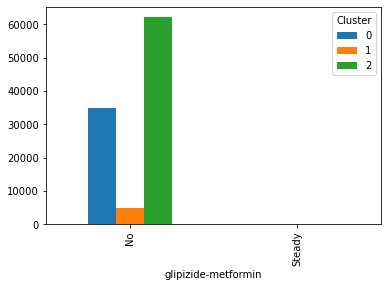

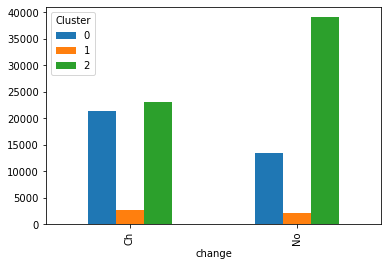

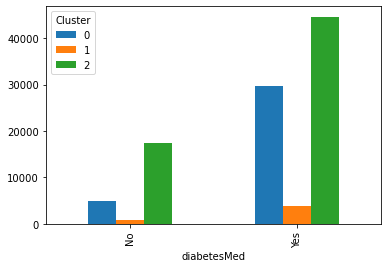

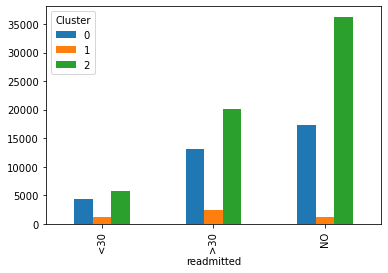

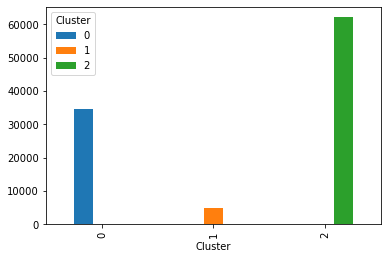

In [52]:
#Obtener las variables categoricas
categorical_df2 = df2_gm3[df2_gm3.drop(numeric.columns,axis=1).columns]

#Dibujar las variables categoricas 
for var in categorical_df2.columns:
    df2_gm3.groupby([var])['Cluster'].value_counts().unstack().plot(kind='bar',stacked = False)